# **MINOR PROJECT**

---


# **TASK 1** - Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

##<-----------------------Question 1----------------------------->

####Q1 : How can you identify hidden trends and patterns in the Powerball winning numbers dataset? Are there any specific techniques or algorithms that can be used to uncover these trends?

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Lottery_Powerball_Winning_Numbers__Beginning_2010.csv', parse_dates=True)

In [ ]:
df.dtypes

Draw Date           object
Winning Numbers     object
Multiplier         float64
dtype: object

In [ ]:
df.isnull().sum()

Draw Date            0
Winning Numbers      0
Multiplier         210
dtype: int64

The 'Multiplier' column has 210 missing entries.

In [ ]:
df['Multiplier'].value_counts()

2.0     616
3.0     368
4.0     128
5.0      93
10.0     14
Name: Multiplier, dtype: int64

In [ ]:
# Filling NULL values in Multiplier column using mode
df['Multiplier'].fillna(value=2.0, inplace=True)

In [ ]:
df.isnull().sum()

Draw Date          0
Winning Numbers    0
Multiplier         0
dtype: int64

In [ ]:
df.head()

,Draw Date,Winning Numbers,Multiplier
0,09/26/2020,11 21 27 36 62 24,3.0
1,09/30/2020,14 18 36 49 67 18,2.0
2,10/03/2020,18 31 36 43 47 20,2.0
3,10/07/2020,06 24 30 53 56 19,2.0
4,10/10/2020,05 18 23 40 50 18,3.0


In [ ]:
df.shape

(1429, 3)

In [ ]:
# Converting the data type of 'Draw Date' column to datetime
df['Draw Date'] = pd.to_datetime(df['Draw Date'])

In [ ]:
df.dtypes

Draw Date          datetime64[ns]
Winning Numbers            object
Multiplier                float64
dtype: object

In [ ]:
df.head()

,Draw Date,Winning Numbers,Multiplier
0,2020-09-26,11 21 27 36 62 24,3.0
1,2020-09-30,14 18 36 49 67 18,2.0
2,2020-10-03,18 31 36 43 47 20,2.0
3,2020-10-07,06 24 30 53 56 19,2.0
4,2020-10-10,05 18 23 40 50 18,3.0


In this game, 5 numbers are choosen between 1 and 69 and a powerball number is choosen which is between 1 and 39. If your Powerball Number matches with the drawn Powerball Number, then you will win some reward

In [ ]:
# Splitting the 'Winning numbers' column to get all the 6 numbers in seperate columns
df[['Num_1','Num_2','Num_3','Num_4','Num_5','Powerball_Num']] = df['Winning Numbers'].str.split(expand=True)
df.head()

,Draw Date,Winning Numbers,Multiplier,Num_1,Num_2,Num_3,Num_4,Num_5,Powerball_Num
0,2020-09-26,11 21 27 36 62 24,3.0,11,21,27,36,62,24
1,2020-09-30,14 18 36 49 67 18,2.0,14,18,36,49,67,18
2,2020-10-03,18 31 36 43 47 20,2.0,18,31,36,43,47,20
3,2020-10-07,06 24 30 53 56 19,2.0,06,24,30,53,56,19
4,2020-10-10,05 18 23 40 50 18,3.0,05,18,23,40,50,18


Out of all the 5 numbers, Num_1 is the smallest and Num_5 is the largest.

In [ ]:
df.dtypes

Draw Date          datetime64[ns]
Winning Numbers            object
Multiplier                float64
Num_1                      object
Num_2                      object
Num_3                      object
Num_4                      object
Num_5                      object
Powerball_Num              object
dtype: object

##**Summary :**
###First, the 'Winning Numbers' column is split into 6 columns to obtain 6 different numbers that are drawn. The null values in 'Multipler' column are filled using mode. Now, using the Multipliers and Winning numbers, we can identify the trends using frequency distribution graphs and correlation matrix.

##<-----------------------Question 2----------------------------->

####Q2 : What are the characteristics of the luckiest numbers in the Powerball lottery? Are there any specific numbers that appear more frequently than others? Can you provide insights into the frequency distribution of the numbers?


In [ ]:
# Creating a frequncy distribution of all the 5 numbers between 1-69
d1 = df['Num_1'].value_counts()
d2 = df['Num_2'].value_counts()
d3 = df['Num_3'].value_counts()
d4 = df['Num_4'].value_counts()
d5 = df['Num_5'].value_counts()
num_freq = pd.concat([d1,d2,d3,d4,d5])
num_freq = num_freq.to_frame()
num_freq.reset_index()
num_freq['Number'] = num_freq.index
num_freq.columns = ['frequency', 'number']
allnumFreq = num_freq.groupby('number').frequency.sum()
allnumFreq = allnumFreq.to_frame()
allnumFreq.reset_index()
allnumFreq['Number'] = allnumFreq.index
allnumFreq.columns = ['Frequency', 'Number']
allnumFreq.head()

,Frequency,Number
number,,
01,107,01
02,105,02
03,112,03
04,98,04
05,106,05


In [ ]:
d1 = d1.to_frame()
d2 = d2.to_frame()
d3 = d3.to_frame()
d4 = d4.to_frame()
d5 = d5.to_frame()

<Axes: xlabel='Number', ylabel='Frequency'>

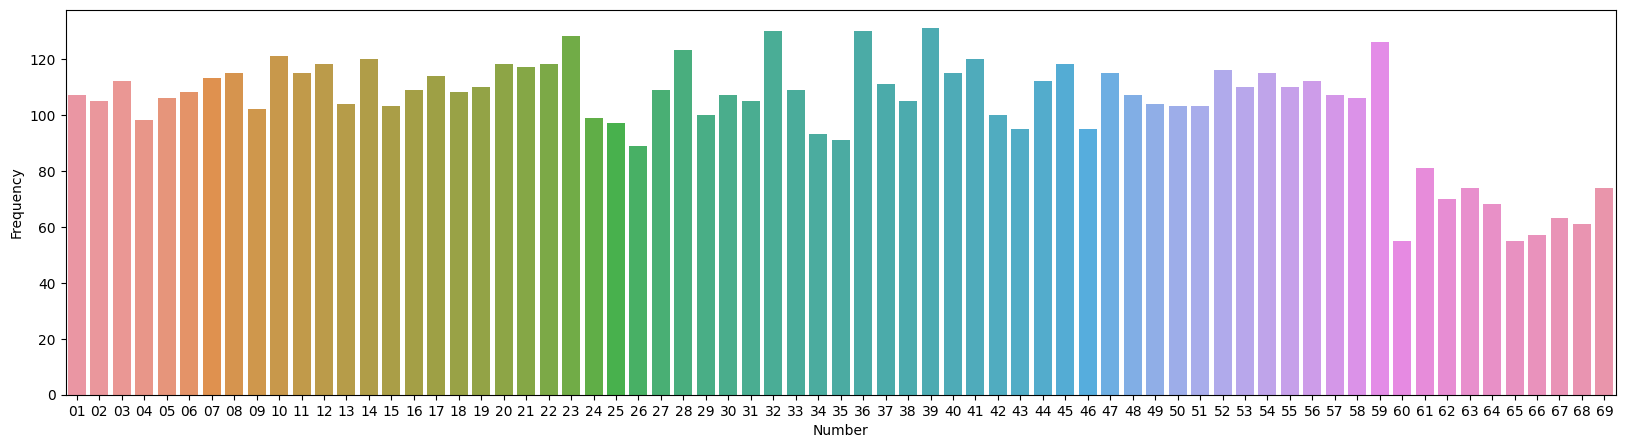

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='Number', y='Frequency', data=allnumFreq)

In [ ]:
allnumFreq.loc[allnumFreq.Frequency == allnumFreq.Frequency.max()]

,Frequency,Number
number,,
39,131,39


In [ ]:
allnumFreq.loc[allnumFreq.Frequency == allnumFreq.Frequency.min()]

,Frequency,Number
number,,
60,55,60
65,55,65


The number drawn out the most from 1-69 is 39.
The numbers drawn out the least from 1-69 are 60 and 65.

Also, from the graph, we can conclude that numbers that are greater than or equal to 60 have a lesser chance to be drawn in the game.

In [ ]:
# Frequency distribution for Num_1
d1.reset_index()
d1['Number_1'] = d1.index
d1 = d1.sort_index()
d1.columns = ['Frequency', 'Number_1']

<Axes: xlabel='Number_1', ylabel='Frequency'>

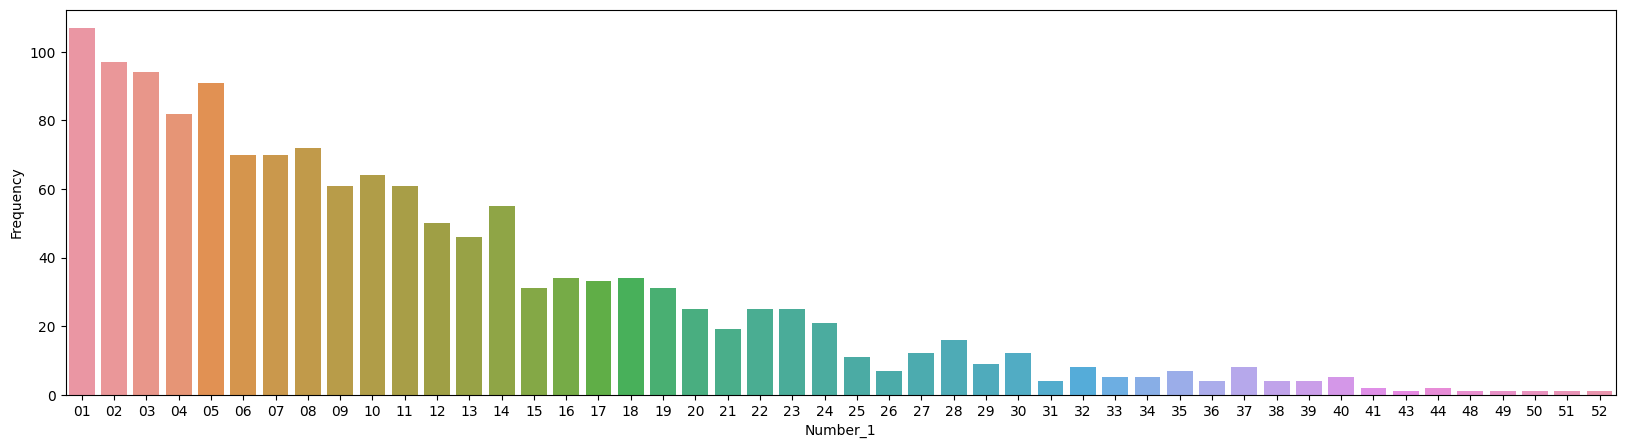

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='Number_1', y='Frequency', data=d1)

In [ ]:
d1.loc[d1.Frequency == d1.Frequency.max()]

,Frequency,Number_1
01,107,01


In [ ]:
d1.loc[d1.Frequency == d1.Frequency.min()]

,Frequency,Number_1
43,1,43
48,1,48
49,1,49
50,1,50
51,1,51
52,1,52


The numbers greater than or equal to 14 have a lesser chance to be drawn out as the smallest number (Num_1).

In [ ]:
# Frequency distribution for Num_2
d2.reset_index()
d2['Number_2'] = d2.index
d2 = d2.sort_index()
d2.columns = ['Frequency', 'Number_2']

<Axes: xlabel='Number_2', ylabel='Frequency'>

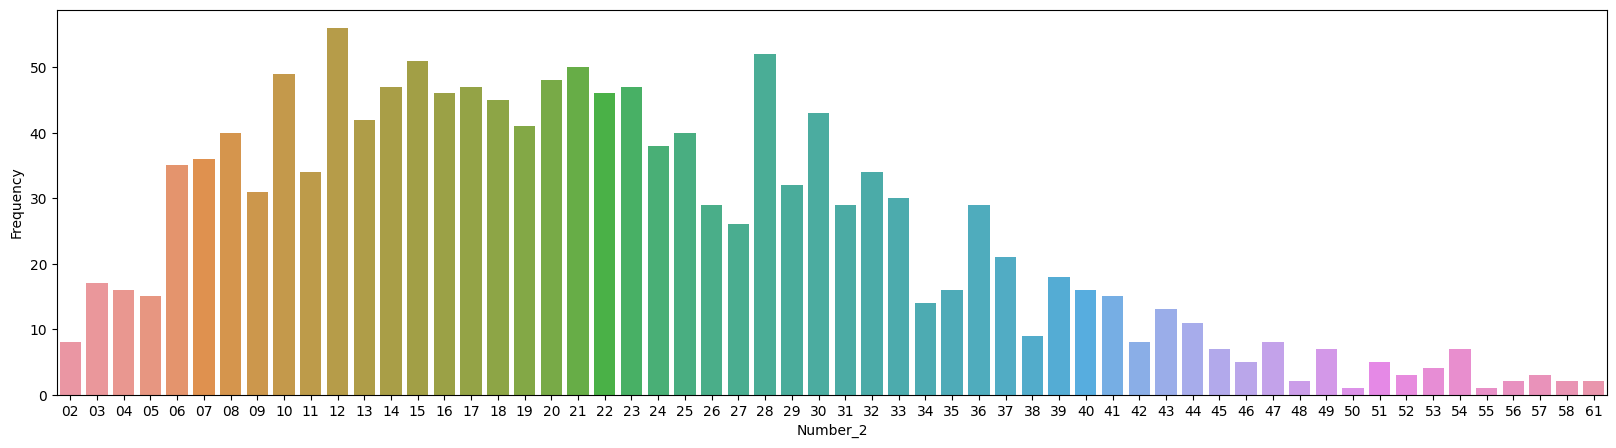

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='Number_2', y='Frequency', data=d2)

In [ ]:
d2.loc[d2.Frequency == d2.Frequency.max()]

,Frequency,Number_2
12,56,12


In [ ]:
d2.loc[d2.Frequency == d2.Frequency.min()]

,Frequency,Number_2
50,1,50
55,1,55


The numbers between 6 and 33 have a greater chance to be drawn out as Num_2.



In [ ]:
# Frequency distribution for Num_3
d3.reset_index()
d3['Number_3'] = d3.index
d3 = d3.sort_index()
d3.columns = ['Frequency', 'Number_3']

<Axes: xlabel='Number_3', ylabel='Frequency'>

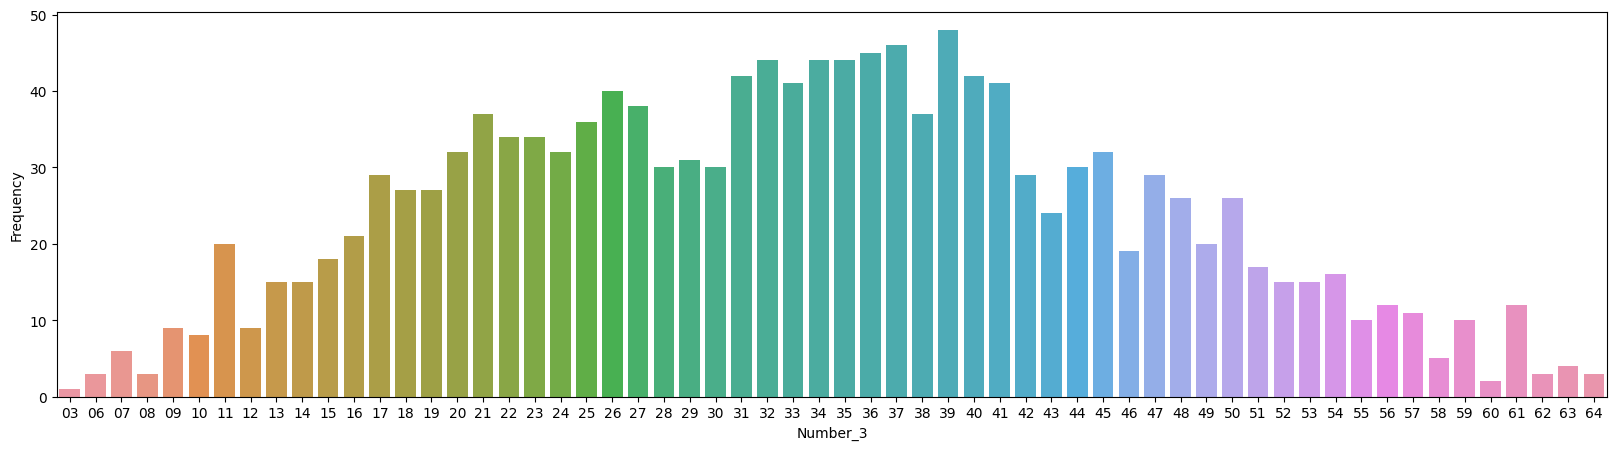

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='Number_3', y='Frequency', data=d3)

In [ ]:
d3.loc[d3.Frequency == d3.Frequency.max()]

,Frequency,Number_3
39,48,39


In [ ]:
d3.loc[d3.Frequency == d3.Frequency.min()]

,Frequency,Number_3
03,1,03


The numbers between 17 and 50 have a greater chance to be drawn out as Num_3.


In [ ]:
# Frequency distribution for Num_4
d4.reset_index()
d4['Number_4'] = d4.index
d4 = d4.sort_index()
d4.columns = ['Frequency', 'Number_4']

<Axes: xlabel='Number_4', ylabel='Frequency'>

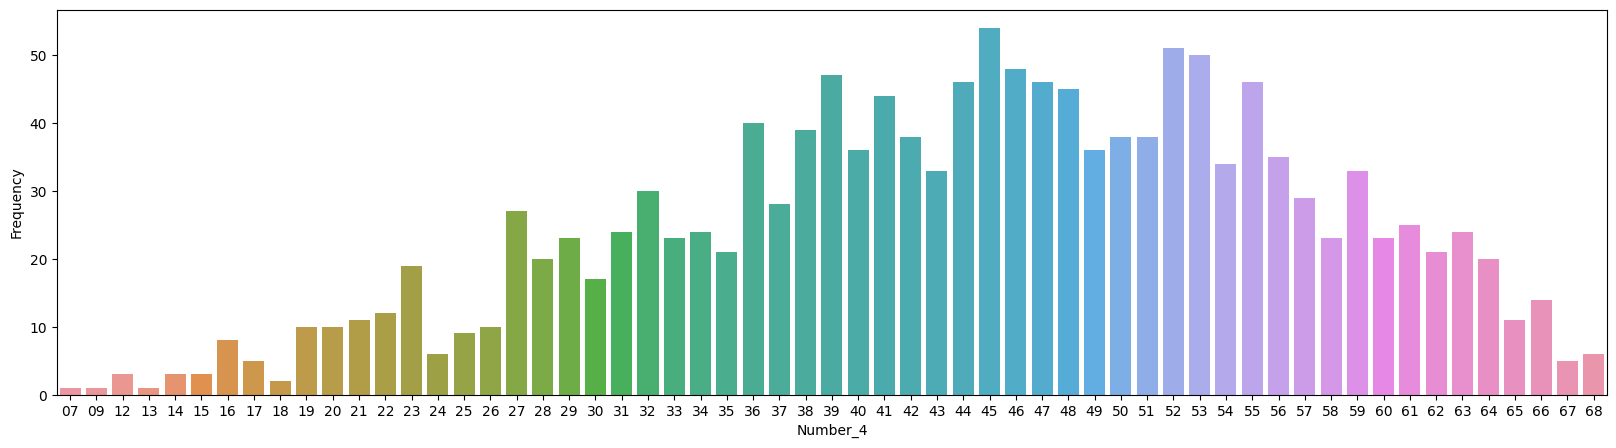

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='Number_4', y='Frequency', data=d4)

In [ ]:
d4.loc[d4.Frequency == d4.Frequency.max()]

,Frequency,Number_4
45,54,45


In [ ]:
d4.loc[d4.Frequency == d4.Frequency.min()]

,Frequency,Number_4
07,1,07
09,1,09
13,1,13


The numbers between 27 and 64 have a greater chance to be drawn out as Num_4.


In [ ]:
# Frequency distribution for Num_5
d5.reset_index()
d5['Number_5'] = d5.index
d5 = d5.sort_index()
d5.columns = ['Frequency', 'Number_5']

<Axes: xlabel='Number_5', ylabel='Frequency'>

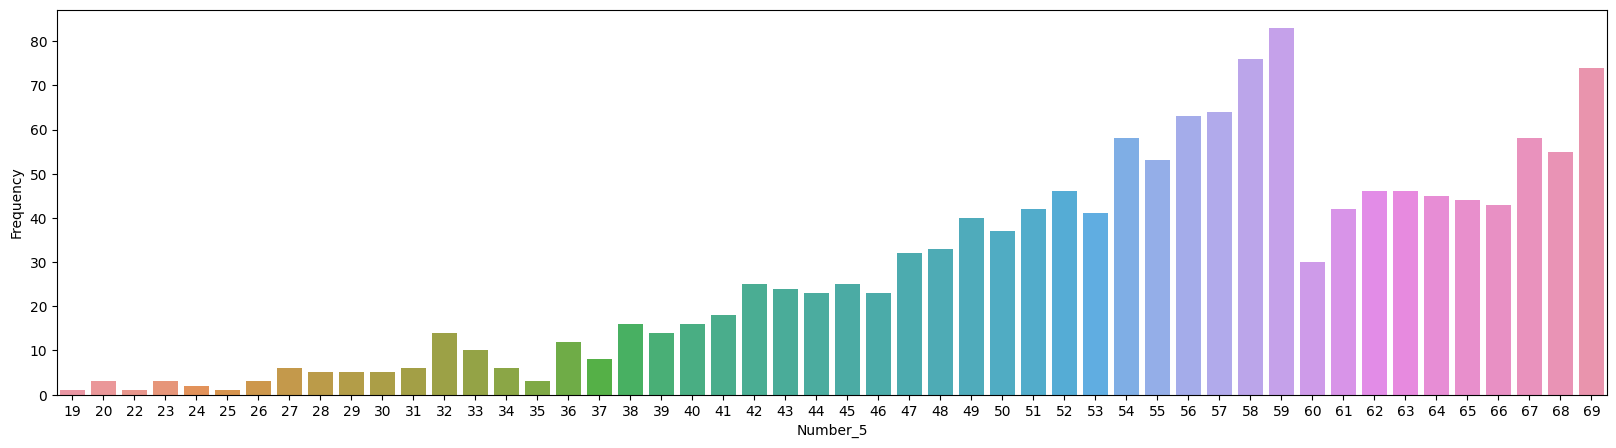

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='Number_5', y='Frequency', data=d5)

In [ ]:
d5.loc[d5.Frequency == d5.Frequency.max()]

,Frequency,Number_5
59,83,59


In [ ]:
d5.loc[d5.Frequency == d5.Frequency.min()]

,Frequency,Number_5
19,1,19
22,1,22
25,1,25


The numbers between 49 and 69 have a greater chance to be drawn out as Num_5.


In [ ]:
df.head()

,Draw Date,Winning Numbers,Multiplier,Num_1,Num_2,Num_3,Num_4,Num_5,Powerball_Num
0,2020-09-26,11 21 27 36 62 24,3.0,11,21,27,36,62,24
1,2020-09-30,14 18 36 49 67 18,2.0,14,18,36,49,67,18
2,2020-10-03,18 31 36 43 47 20,2.0,18,31,36,43,47,20
3,2020-10-07,06 24 30 53 56 19,2.0,06,24,30,53,56,19
4,2020-10-10,05 18 23 40 50 18,3.0,05,18,23,40,50,18


In [ ]:
# Frequency Distribution for Powerball_Num
powerballFreq = df['Powerball_Num'].value_counts()
powerballFreq = powerballFreq.to_frame()
powerballFreq.reset_index()
powerballFreq['PowerballNumber'] = powerballFreq.index
powerballFreq = powerballFreq.sort_index()
powerballFreq.columns = ['Frequency', 'PowerballNumber']

In [ ]:
powerballFreq.dtypes

Frequency           int64
PowerballNumber    object
dtype: object

<Axes: xlabel='PowerballNumber', ylabel='Frequency'>

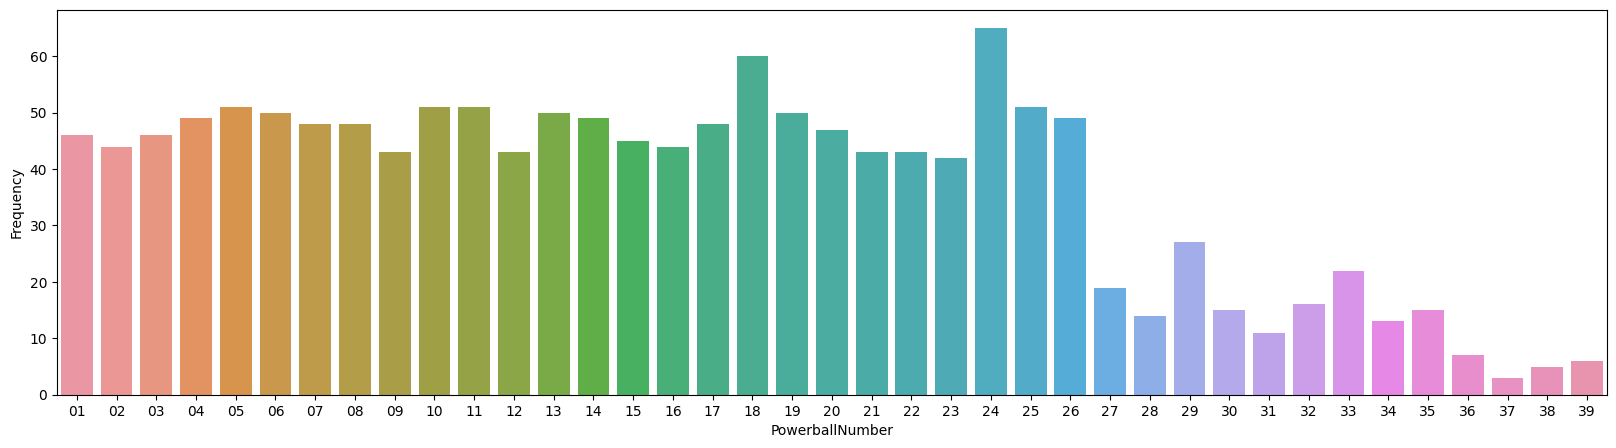

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='PowerballNumber', y='Frequency', data=powerballFreq)

In [ ]:
powerballFreq.loc[powerballFreq.Frequency == powerballFreq.Frequency.max()]

,Frequency,PowerballNumber
24,65,24


In [ ]:
powerballFreq.loc[powerballFreq.Frequency == powerballFreq.Frequency.min()]

,Frequency,PowerballNumber
37,3,37


The Powerball number which is drawn out the most from 1-39 is 24.
The Powerball number which is drawn out the least from 1-39 is 37.

The numbers between 1 and 26 have a greater chance to be drawn out as Powerball_Num.

###On analyzing all the numbers that are drawn overtime, following is observed:

*   Number 39 is the most drawn number.
*   Numbers 60 and 65 are the least drawn numbers.
*   Maximum numbers are drawn in the range of 1 to 59.


###The maximum and minimum drawn numbers for Num_1, Num_2, Num_3, Num_4. Num_5 are:

*   **Num_1 :**.....*max* -> 1......*min* -> 43,48,49,50,51,52
*   **Num_2 :**.....*max* -> 12.....*min* -> 50,55
*   **Num_3 :**.....*max* -> 39.....*min* -> 3
*   **Num_4 :**.....*max* -> 45.....*min* -> 7,9,13
*   **Num_5 :**.....*max* -> 59.....*min* -> 25,19,22
*   **Powerball_Num :**.....*max* -> 24.....*min* -> 37


###Range of numbers which have maximum frequency:

*   **Num_1 :** 1 to 14
*   **Num_2 :** 6 to 33
*   **Num_3 :** 17 to 50
*   **Num_4 :** 27 to 64
*   **Num_5 :** 49 to 69
*   **Powerball_Num :** 1 to 26

##**Summary :**
###Through the above analysis, we get to know that which all numbers have higher chances of being drawn.

##<-----------------------Question 3----------------------------->

####Q3 : Can you provide a visualization of the winning numbers over time? For example, a line plot showing the frequency of each number being drawn or a heat map showing the correlation between different numbers.


In [ ]:
df.head()

,Draw Date,Winning Numbers,Multiplier,Num_1,Num_2,Num_3,Num_4,Num_5,Powerball_Num
0,2020-09-26,11 21 27 36 62 24,3.0,11,21,27,36,62,24
1,2020-09-30,14 18 36 49 67 18,2.0,14,18,36,49,67,18
2,2020-10-03,18 31 36 43 47 20,2.0,18,31,36,43,47,20
3,2020-10-07,06 24 30 53 56 19,2.0,06,24,30,53,56,19
4,2020-10-10,05 18 23 40 50 18,3.0,05,18,23,40,50,18


In [ ]:
df.dtypes

Draw Date          datetime64[ns]
Winning Numbers            object
Multiplier                float64
Num_1                      object
Num_2                      object
Num_3                      object
Num_4                      object
Num_5                      object
Powerball_Num              object
dtype: object

In [ ]:
# Converting the Numbers to int
df['Num_1'] = pd.to_numeric(df['Num_1'])
df['Num_2'] = pd.to_numeric(df['Num_2'])
df['Num_3'] = pd.to_numeric(df['Num_3'])
df['Num_4'] = pd.to_numeric(df['Num_4'])
df['Num_5'] = pd.to_numeric(df['Num_5'])
df['Powerball_Num'] = pd.to_numeric(df['Powerball_Num'])
df.dtypes

Draw Date          datetime64[ns]
Winning Numbers            object
Multiplier                float64
Num_1                       int64
Num_2                       int64
Num_3                       int64
Num_4                       int64
Num_5                       int64
Powerball_Num               int64
dtype: object

<Axes: >

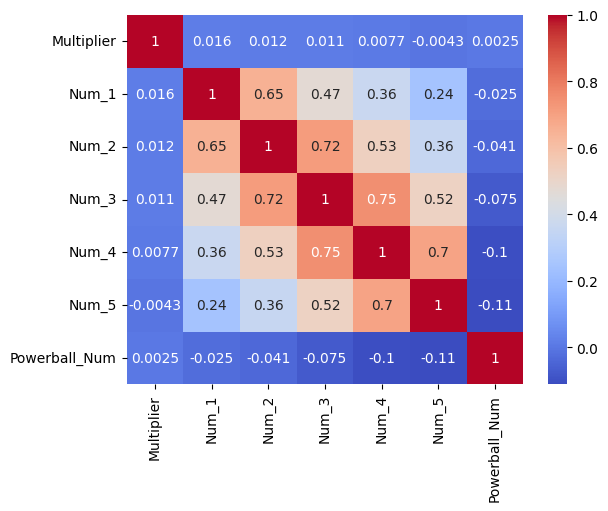

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

##**Summary :**
###From this correlation matrix, we can conclude:

*   Num_1, Num_2, Num_3, Num_4, Num_5 are highly correlated to Multiplier.
*   Num_1, Num_2, Num_3, Num_4, Num_5 are highly correlated to Powerball_Num.
*   Powerball_Num is correlated to Multiplier.





# **TASK 2** - Classification/Regression

Perform following steps on the same dataset which you used for EDA.
> - Data Preprocessing (as per requirement)
> - Feature Engineering
> - Split dataset in train-test (80:20 ratio)
> - Model selection
> - Model training
> - Model evaluation
> - Fine-tune the Model
> - Make predictions

Summarize your model's performance by evaluation metrices

##<-----------------------Question 4----------------------------->

####Q4 : How can you predict the luckiest number for future Powerball drawings? Are there any machine learning algorithms or statistical techniques that can be employed for this prediction task?


In [ ]:
# Creating a copy of df and setting the 'Draw Date' column as index column
df1 = df.copy()
df1 = df1.set_index('Draw Date')
df1.sort_index(inplace=True)
df1.head()

,Winning Numbers,Multiplier,Num_1,Num_2,Num_3,Num_4,Num_5,Powerball_Num
Draw Date,,,,,,,,
2010-02-03,17 22 36 37 52 24,2.0,17,22,36,37,52,24
2010-02-06,14 22 52 54 59 04,3.0,14,22,52,54,59,4
2010-02-10,05 08 29 37 38 34,5.0,5,8,29,37,38,34
2010-02-13,10 14 30 40 51 01,4.0,10,14,30,40,51,1
2010-02-17,07 08 19 26 36 15,3.0,7,8,19,26,36,15


In [ ]:
train_size = int(len(df1) * 0.8)  # 80% for training
train = df1[:train_size]
test = df1[train_size:]

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 25.1 MB/s eta 0:00:00


For Num_1,

<Axes: xlabel='Draw Date'>

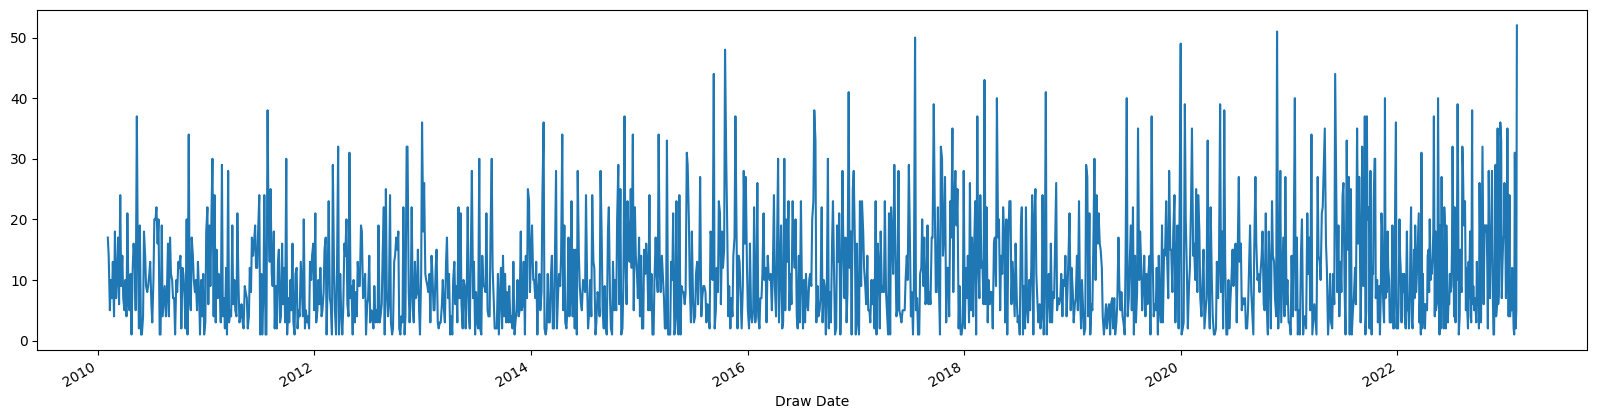

In [ ]:
df1['Num_1'].plot(figsize=(20,5))

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

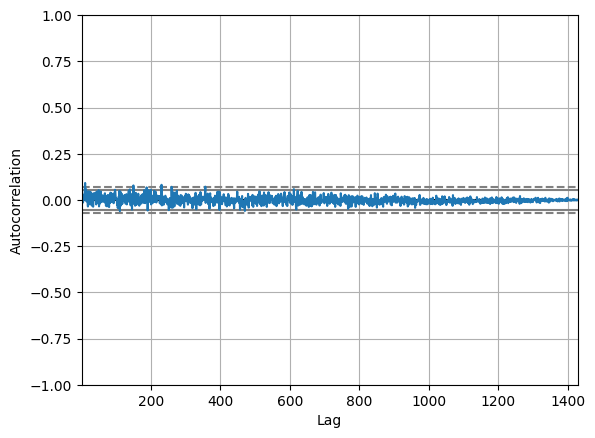

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df1['Num_1'])

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [ ]:
# LJUNG BOX TEST to identify white noise
acorr_ljungbox(train['Num_1'].values, lags=None)

,lb_stat,lb_pvalue
1,0.058245,0.809292
2,0.284382,0.867456
3,1.199309,0.753170
4,1.199353,0.878205
5,1.394414,0.924923
6,1.395658,0.966122
7,2.130009,0.952295
8,2.151597,0.976008
9,2.253978,0.986785
10,2.953594,0.982495


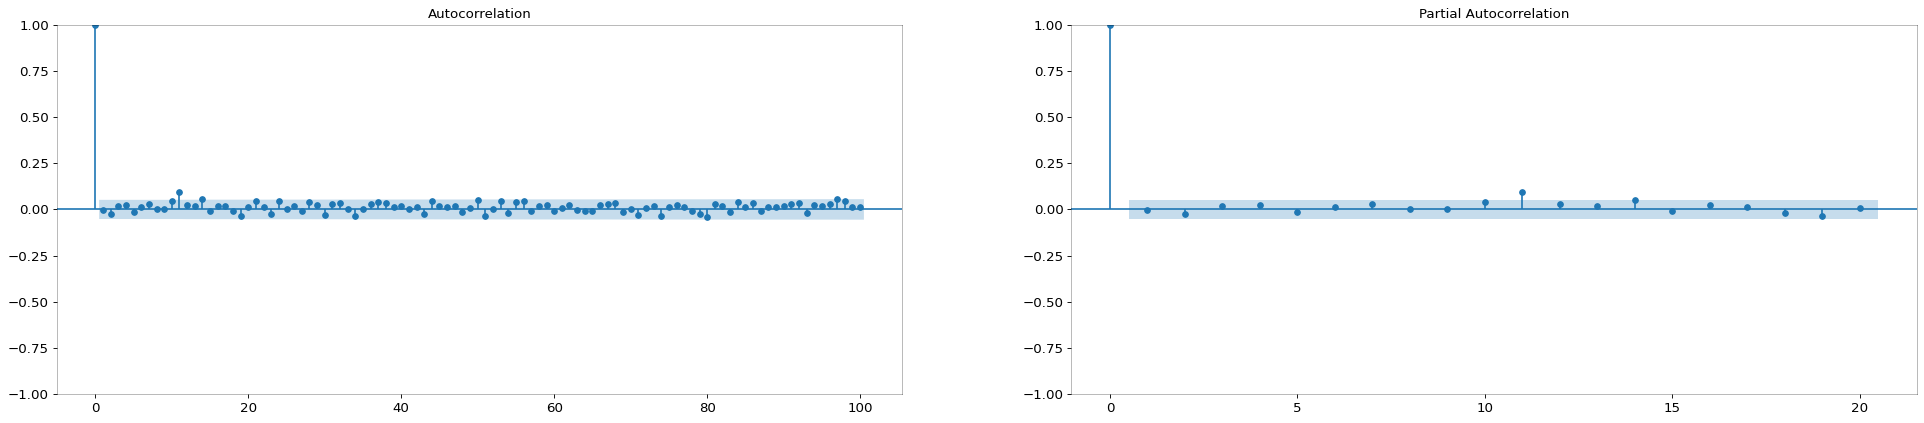

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(30,6), dpi=80)
plot_acf(df1.Num_1.tolist(), ax=ax1, lags=100)
plot_pacf(df1.Num_1.tolist(), ax=ax2, lags=20)

ax1.spines['top'].set_alpha(.3); ax2.spines['top'].set_alpha(.3)
ax1.spines['bottom'].set_alpha(.3); ax2.spines['bottom'].set_alpha(.3)
ax1.spines['right'].set_alpha(.3); ax2.spines['right'].set_alpha(.3)
ax1.spines['left'].set_alpha(.3); ax2.spines['left'].set_alpha(.3)

ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()




*   From the autocorrelation plot, it is clearly visible that the plot is close to zero.
*   In the ljung box test, the lb_pvalues for the train data are greater than o.o5
*   In the ACF plot, most of the spikes are within the shaded blue region

From all these results, we can conclude that Num_1 column is a case of white noise. Hence, no correlation can be found between the number and the date.



For Num_2,

<Axes: xlabel='Draw Date'>

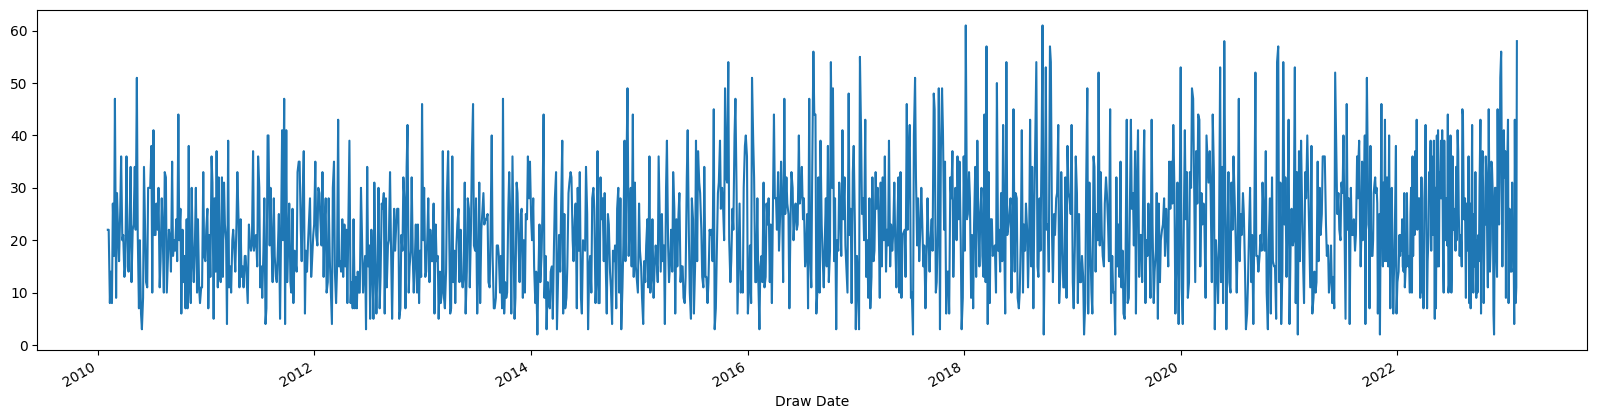

In [ ]:
df1['Num_2'].plot(figsize=(20,5))

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

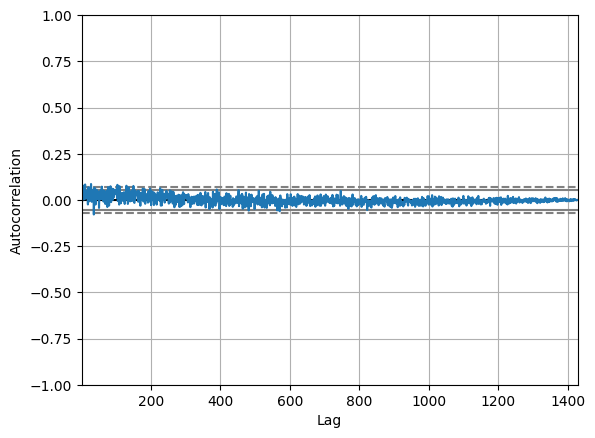

In [ ]:
autocorrelation_plot(df1['Num_2'])

In [ ]:
# Using ljungbox for train data of Num_2
acorr_ljungbox(train['Num_2'].values, lags=None)

,lb_stat,lb_pvalue
1,0.002182,0.962743
2,1.140786,0.565303
3,1.165638,0.761257
4,2.536755,0.638066
5,2.626569,0.757324
6,7.841324,0.249960
7,10.616754,0.156232
8,10.882741,0.208432
9,10.951415,0.279054
10,12.787055,0.235823


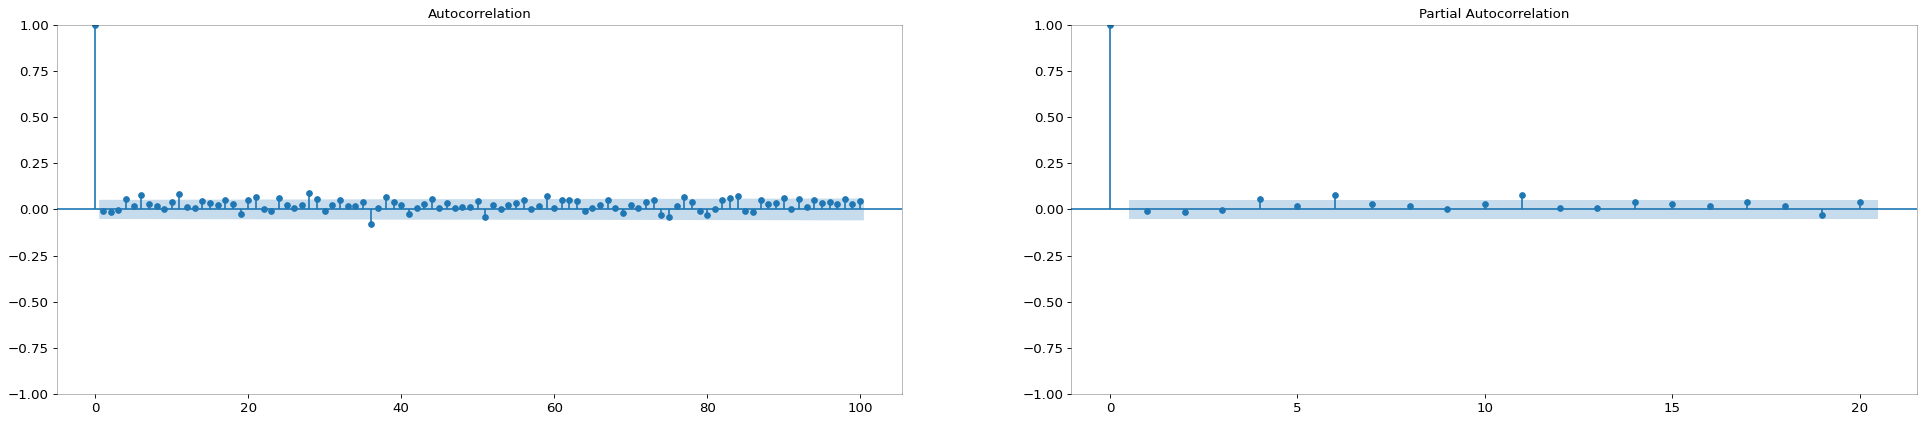

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(30,6), dpi=80)
plot_acf(df1.Num_2.tolist(), ax=ax1, lags=100)
plot_pacf(df1.Num_2.tolist(), ax=ax2, lags=20)

ax1.spines['top'].set_alpha(.3); ax2.spines['top'].set_alpha(.3)
ax1.spines['bottom'].set_alpha(.3); ax2.spines['bottom'].set_alpha(.3)
ax1.spines['right'].set_alpha(.3); ax2.spines['right'].set_alpha(.3)
ax1.spines['left'].set_alpha(.3); ax2.spines['left'].set_alpha(.3)

ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()


*   From the autocorrelation plot, it is clearly visible that the plot is close to zero.
*   In the ljung box test, the lb_pvalues for the train data are greater than o.o5
*   In the ACF plot, most of the spikes are within the shaded blue region

From all these results, we can conclude that Num_2 column is a case of white noise. Hence, no correlation can be found between the number and the date.

For Num_3,

<Axes: xlabel='Draw Date'>

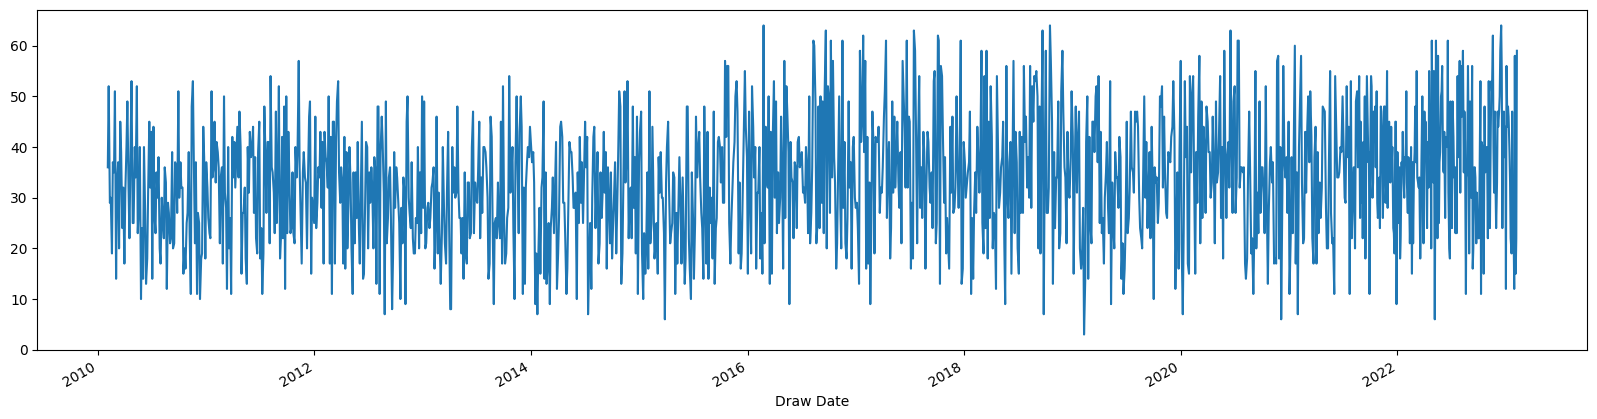

In [ ]:
df1['Num_3'].plot(figsize=(20,5))

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

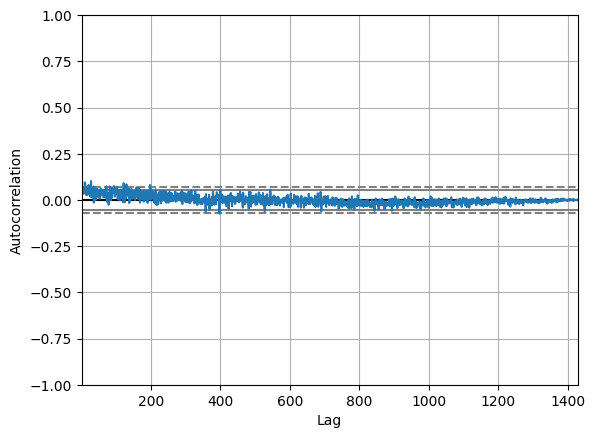

In [ ]:
autocorrelation_plot(df1['Num_3'])

In [ ]:
acorr_ljungbox(train['Num_3'].values, lags=None)

,lb_stat,lb_pvalue
1,2.258424,0.132889
2,2.468383,0.291070
3,2.998922,0.391791
4,3.931299,0.415383
5,5.111071,0.402476
6,6.070535,0.415335
7,7.112160,0.417296
8,10.136287,0.255590
9,14.365443,0.109907
10,22.490659,0.012791


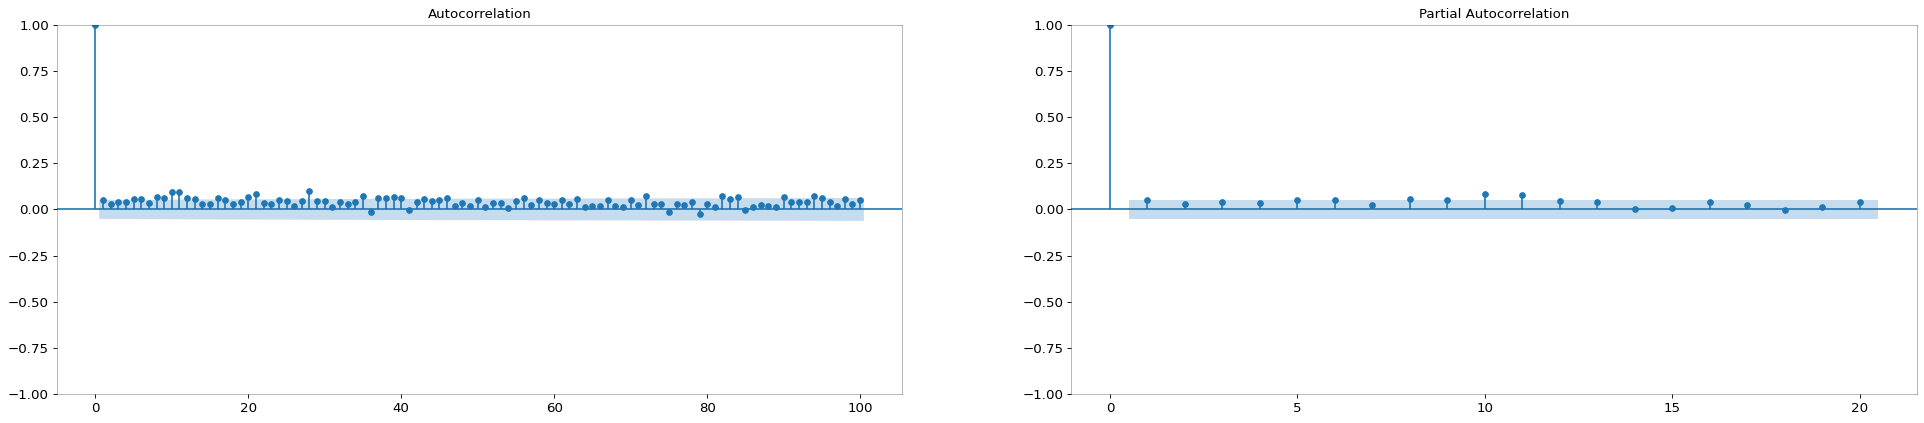

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(30,6), dpi=80)
plot_acf(df1.Num_3.tolist(), ax=ax1, lags=100)
plot_pacf(df1.Num_3.tolist(), ax=ax2, lags=20)

ax1.spines['top'].set_alpha(.3); ax2.spines['top'].set_alpha(.3)
ax1.spines['bottom'].set_alpha(.3); ax2.spines['bottom'].set_alpha(.3)
ax1.spines['right'].set_alpha(.3); ax2.spines['right'].set_alpha(.3)
ax1.spines['left'].set_alpha(.3); ax2.spines['left'].set_alpha(.3)

ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()


*   From the autocorrelation plot, it is clearly visible that the plot is close to zero.
*   In the ljung box test, most of the lb_pvalues for the train data are greater than o.o5
*   In the ACF plot, most of the spikes are within the shaded blue region

From all these results, we can conclude that Num_3 column is a case of white noise. Hence, no correlation can be found between the number and the date.

For Num_4,

<Axes: xlabel='Draw Date'>

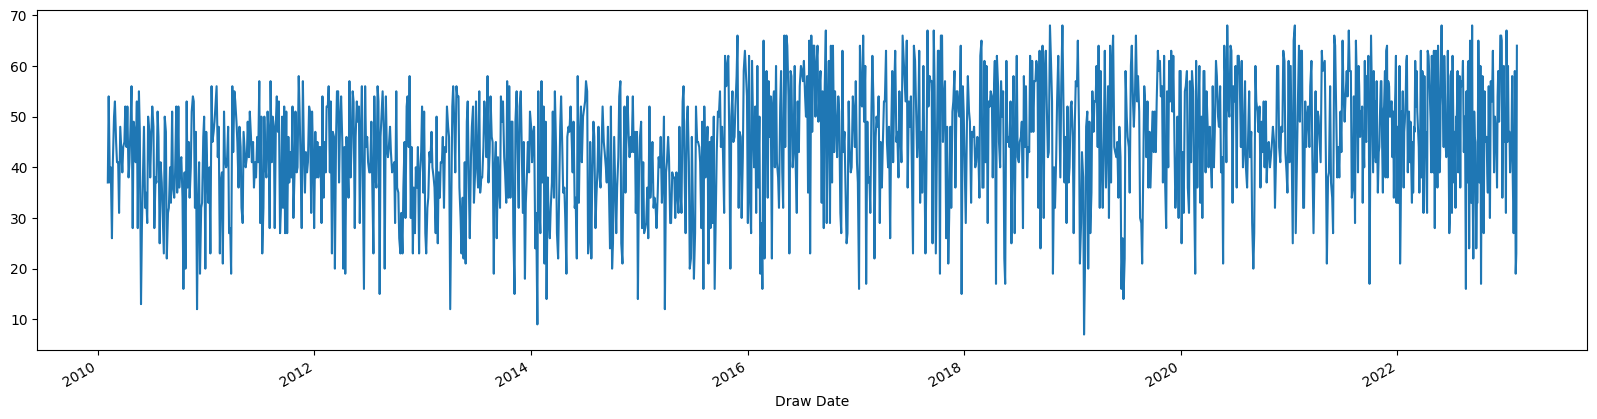

In [ ]:
df1['Num_4'].plot(figsize=(20,5))

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

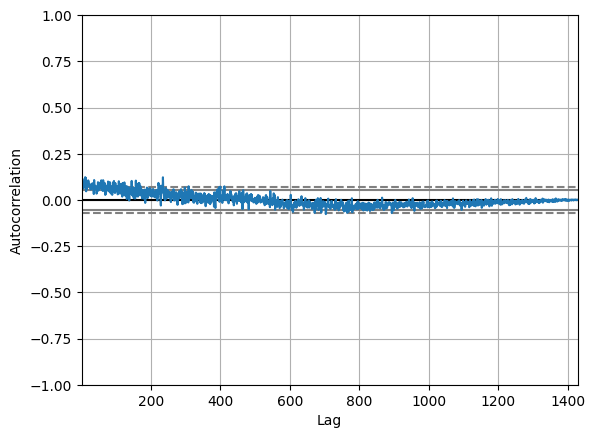

In [ ]:
autocorrelation_plot(df1['Num_4'])

In [ ]:
acorr_ljungbox(test['Num_4'].values, lags=None)

,lb_stat,lb_pvalue
1,0.032502,0.856930
2,3.713345,0.156191
3,4.959503,0.174787
4,5.486052,0.240958
5,6.833630,0.233310
6,6.849673,0.334973
7,7.762031,0.354045
8,8.022689,0.431257
9,8.302824,0.503940
10,8.794604,0.551701


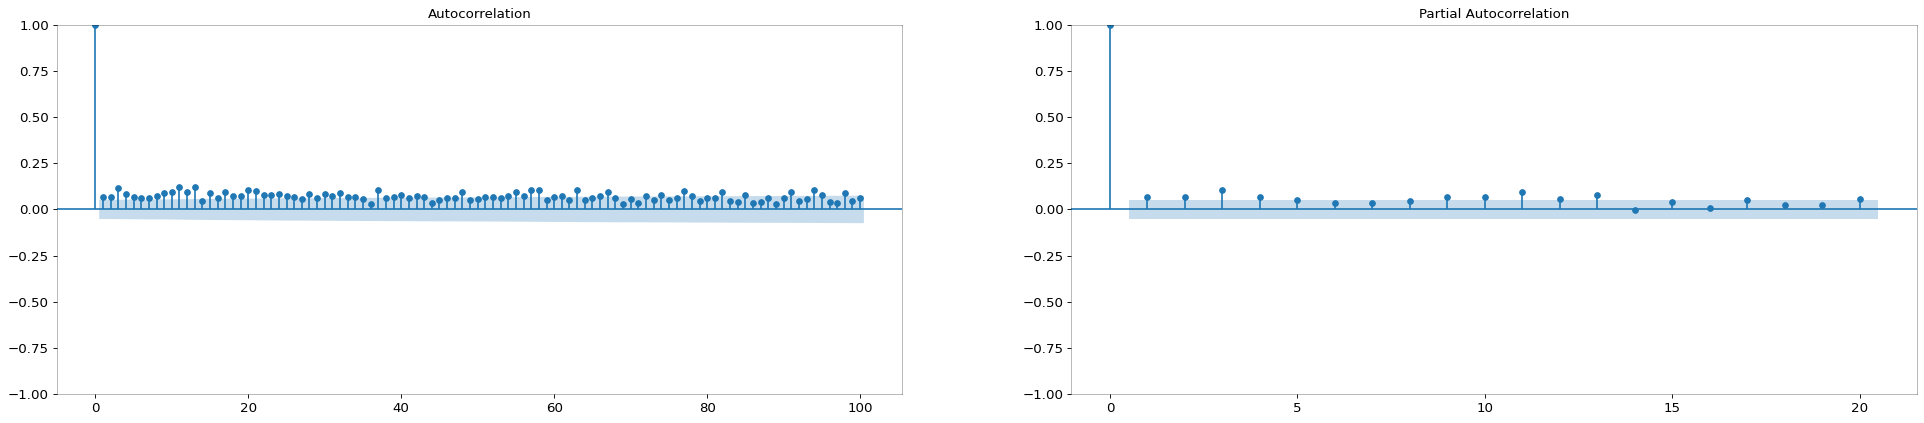

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(30,6), dpi=80)
plot_acf(df1.Num_4.tolist(), ax=ax1, lags=100)
plot_pacf(df1.Num_4.tolist(), ax=ax2, lags=20)

ax1.spines['top'].set_alpha(.3); ax2.spines['top'].set_alpha(.3)
ax1.spines['bottom'].set_alpha(.3); ax2.spines['bottom'].set_alpha(.3)
ax1.spines['right'].set_alpha(.3); ax2.spines['right'].set_alpha(.3)
ax1.spines['left'].set_alpha(.3); ax2.spines['left'].set_alpha(.3)

ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()


*   From the autocorrelation plot, it is clearly visible that the plot is close to zero towards the end.
*   In the ljung box test, the lb_pvalues for the test data are greater than o.o5
*   In the ACF plot, most of the spikes are within the shaded blue region

From all these results, we can conclude that the test part of Num_4 column is a case of white noise. Hence, the prediction can be affected.

For Num_5,

<Axes: xlabel='Draw Date'>

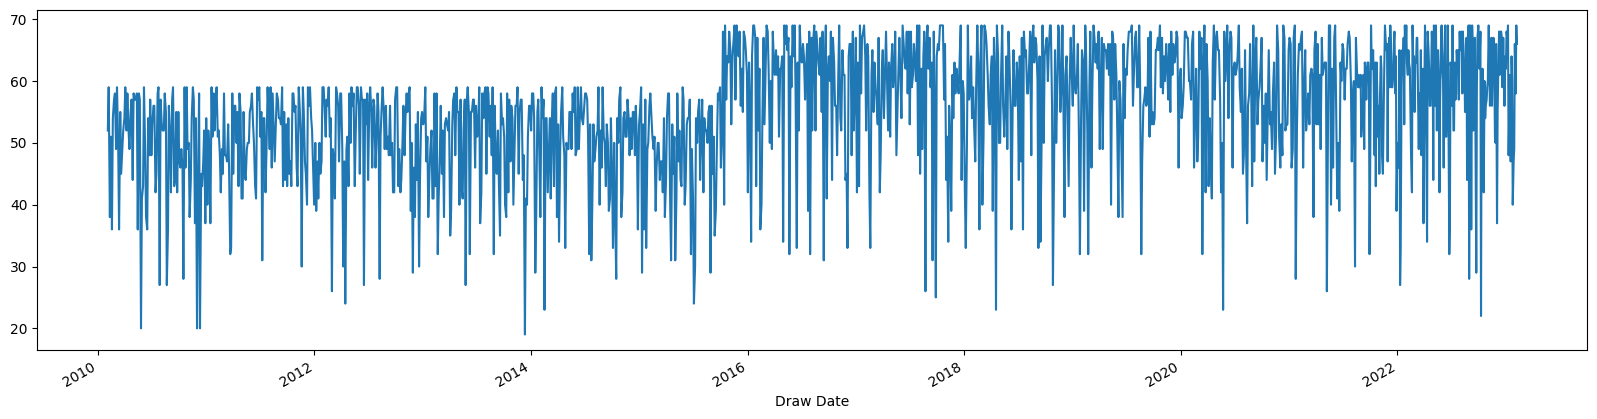

In [ ]:
df1['Num_5'].plot(figsize=(20,5))

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

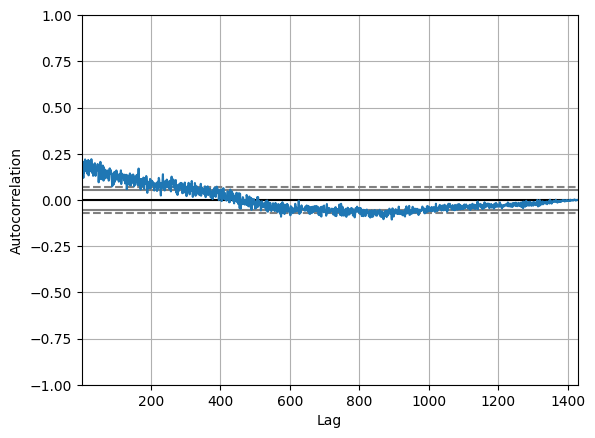

In [ ]:
autocorrelation_plot(df1['Num_5'])

In [ ]:
acorr_ljungbox(test['Num_5'].values, lags=None)

,lb_stat,lb_pvalue
1,0.251481,0.616034
2,4.145373,0.125847
3,4.681128,0.196692
4,4.790151,0.309515
5,4.804175,0.440243
6,5.131546,0.527056
7,5.757579,0.568324
8,13.844966,0.085897
9,13.926770,0.124954
10,14.050476,0.170702


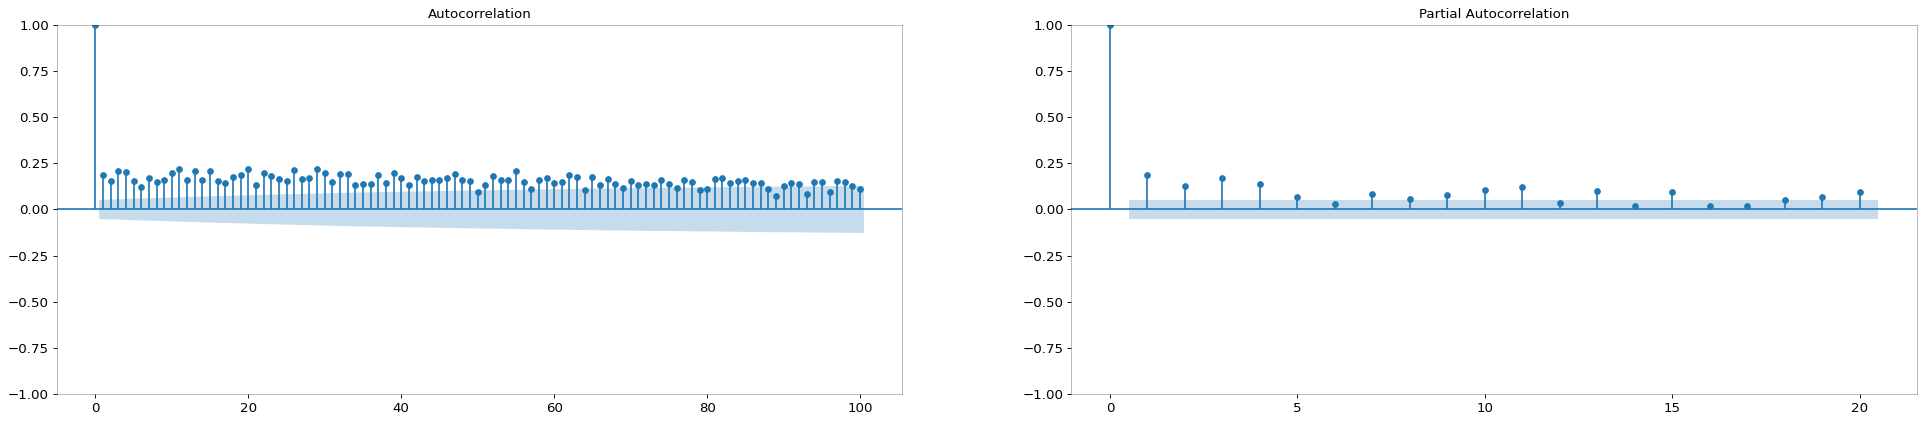

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(30,6), dpi=80)
plot_acf(df1.Num_5.tolist(), ax=ax1, lags=100)
plot_pacf(df1.Num_5.tolist(), ax=ax2, lags=20)

ax1.spines['top'].set_alpha(.3); ax2.spines['top'].set_alpha(.3)
ax1.spines['bottom'].set_alpha(.3); ax2.spines['bottom'].set_alpha(.3)
ax1.spines['right'].set_alpha(.3); ax2.spines['right'].set_alpha(.3)
ax1.spines['left'].set_alpha(.3); ax2.spines['left'].set_alpha(.3)

ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()


*   From the autocorrelation plot, it is clearly visible that the plot is close to zero towards the end.
*   In the ljung box test, the lb_pvalues for the test data are greater than o.o5
*   In the ACF plot, most of the spikes are within the shaded blue region

From all these results, we can conclude that the test part of Num_5 column is a case of white noise. Hence, the prediction can be affected.

For Powerball_Num

<Axes: xlabel='Draw Date'>

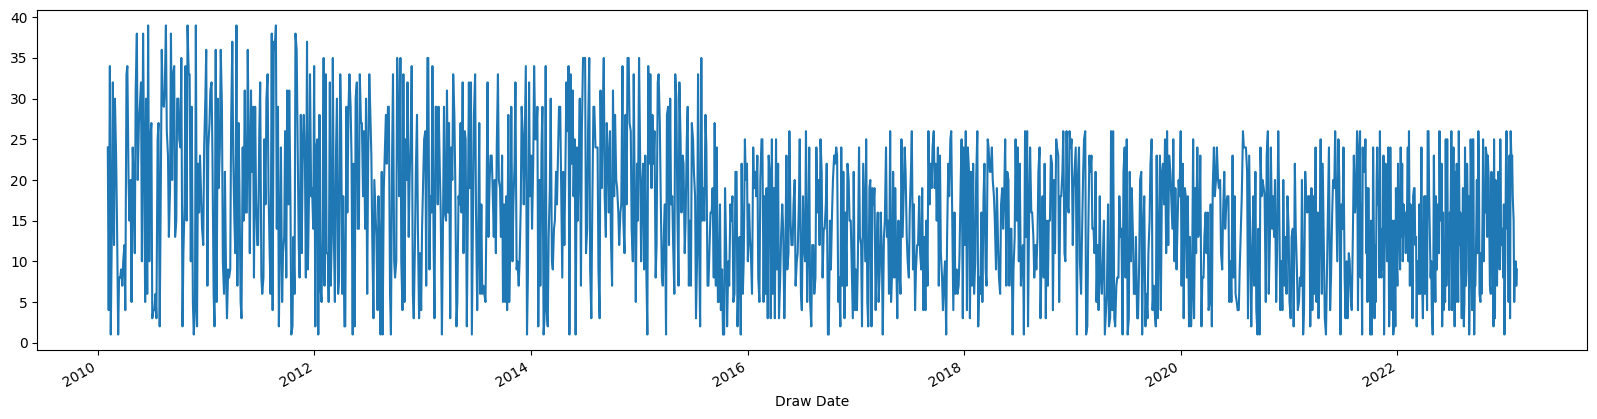

In [ ]:
df1['Powerball_Num'].plot(figsize=(20,5))

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

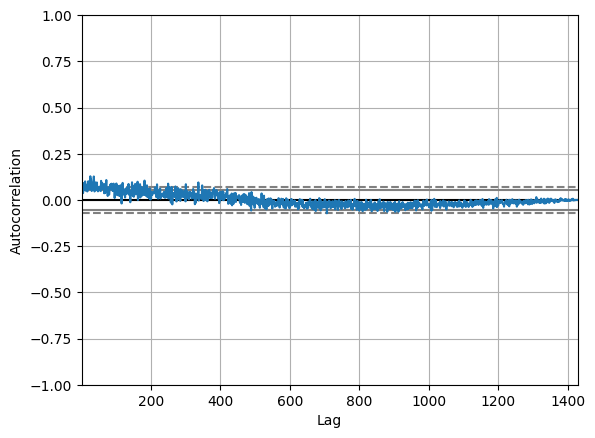

In [ ]:
autocorrelation_plot(df1['Powerball_Num'])

In [ ]:
acorr_ljungbox(test['Powerball_Num'].values, lags=None)

,lb_stat,lb_pvalue
1,2.365361,0.124055
2,2.542199,0.280523
3,2.637814,0.450899
4,2.646155,0.618669
5,4.444562,0.487335
6,4.449116,0.616136
7,6.306853,0.504411
8,7.655157,0.467859
9,7.913953,0.542840
10,13.680481,0.188071


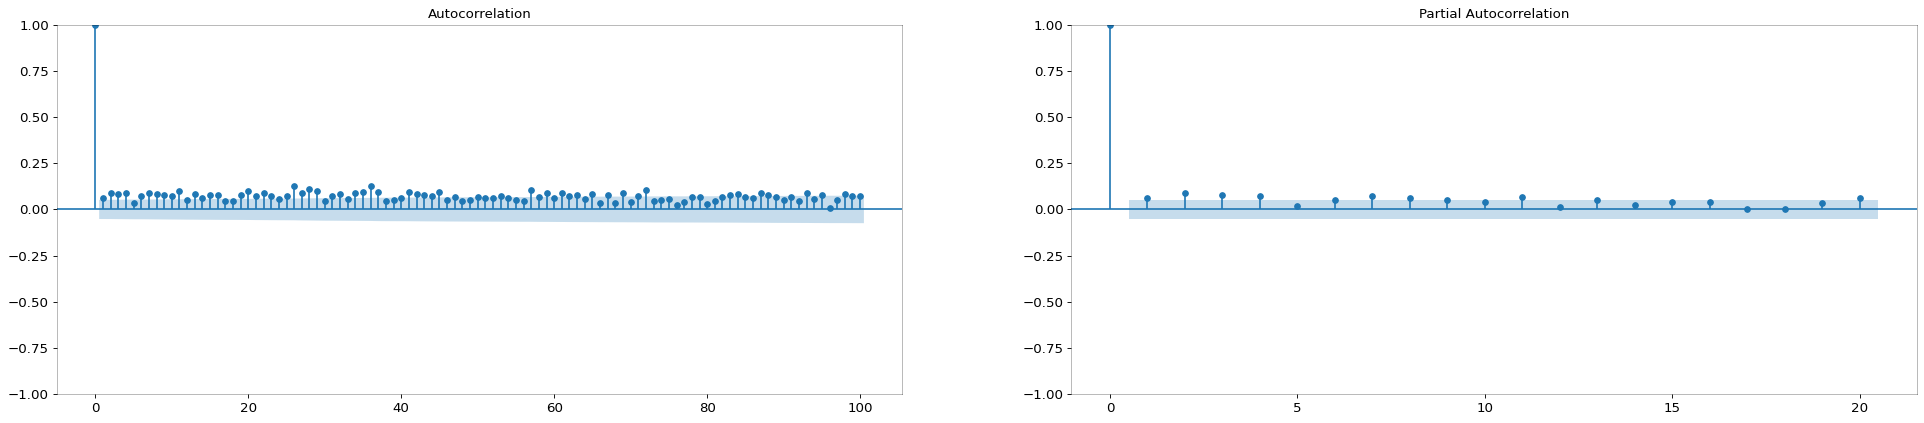

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(30,6), dpi=80)
plot_acf(df1.Powerball_Num.tolist(), ax=ax1, lags=100)
plot_pacf(df1.Powerball_Num.tolist(), ax=ax2, lags=20)

ax1.spines['top'].set_alpha(.3); ax2.spines['top'].set_alpha(.3)
ax1.spines['bottom'].set_alpha(.3); ax2.spines['bottom'].set_alpha(.3)
ax1.spines['right'].set_alpha(.3); ax2.spines['right'].set_alpha(.3)
ax1.spines['left'].set_alpha(.3); ax2.spines['left'].set_alpha(.3)

ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()


*   From the autocorrelation plot, it is clearly visible that the plot is close to zero towards the end.
*   In the ljung box test, the lb_pvalues for the test data are greater than o.o5
*   In the ACF plot, most of the spikes are within the shaded blue region

From all these results, we can conclude that the test part of Powerball_Num column is a case of white noise. Hence, the prediction can be affected.

##ARIMA test for all the numbers

In [ ]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
  dftest = adfuller(dataset, autolag='AIC')
  print("1. ADF : ", dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num of Lags : ", dftest[2])
  print("4. Num of observations used for ADF Regression and Critical Values Calculation : ", dftest[3])
  print("5. Critical Values : ")
  for key,val in dftest[4].items():
    print('\t',key,': ',val)

In [ ]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

For Num_1,

In [ ]:
ad_test(df1['Num_1'])

1. ADF :  -37.5685046759
2. P-Value :  0.0
3. Num of Lags :  0
4. Num of observations used for ADF Regression and Critical Values Calculation :  1428
5. Critical Values : 
	 1% :  -3.4349376007389965
	 5% :  -2.8635661096787812
	 10% :  -2.567848688436159


In [ ]:
stepwise_fit1 = auto_arima(df1['Num_1'], trace=True, supress_warnings=True)
stepwise_fit1.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=6.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11369.039, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10984.513, Time=0.40 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=4.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11367.044, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=10793.428, Time=0.84 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=10691.200, Time=1.16 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=10646.546, Time=1.39 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=10605.116, Time=1.57 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=11.35 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=6.87 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=10603.123, Time=0.79 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=10644.554, Time=0.78 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=inf, Time=4.89 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=inf, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1429
Model:               SARIMAX(5, 1, 0)   Log Likelihood               -5295.562
Date:                Fri, 30 Jun 2023   AIC                          10603.123
Time:                        15:58:21   BIC                          10634.707
Sample:                             0   HQIC                         10614.918
                               - 1429                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8389      0.027    -31.467      0.000      -0.891      -0.787
ar.L2         -0.7013      0.034    -20.906      0.000      -0.767      -0.636
ar.L3         -0.5124      0.035    -14.682      0.000      -0.581      -0.444
ar.L4         -0.3211      0.033     -9.590      0.000      -0.387      -0.255
ar.L5         -0.1744      0.026     -6.823      0.000      -0.225      -0.124
sigma2        97.3316      2.954     32.952      0.000      91.542     103.121
===================================================================================
Ljung-Box (L1) (Q):                   1.13   Jarque-Bera (JB):               302.03
Prob(Q):                              0.29   Prob(JB):                         0.00
Heteroskedasticity (H):               1.65   Skew:                             0.98
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
exog_var = ['Multiplier']
model1=ARIMA(endog=train['Num_1'], exog=train[exog_var], order=(5,1,0))
model1=model1.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Num_1   No. Observations:                 1143
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -4200.007
Date:                Fri, 30 Jun 2023   AIC                           8414.014
Time:                        15:58:22   BIC                           8449.298
Sample:                             0   HQIC                          8427.338
                               - 1143                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Multiplier    -0.0156      0.281     -0.056      0.956      -0.567       0.535
ar.L1         -0.8393      0.029    -28.716      0.000      -0.897      -0.782
ar.L2         -0.6861      0.037    -18.406      0.000      -0.759      -0.613
ar.L3         -0.4885      0.038    -12.756      0.000      -0.564      -0.413
ar.L4         -0.3190      0.037     -8.609      0.000      -0.392      -0.246
ar.L5         -0.1649      0.028     -5.786      0.000      -0.221      -0.109
sigma2        91.5349      3.060     29.911      0.000      85.537      97.533
===================================================================================
Ljung-Box (L1) (Q):                   0.85   Jarque-Bera (JB):               254.43
Prob(Q):                              0.36   Prob(JB):                         0.00
Heteroskedasticity (H):               1.60   Skew:                             0.99
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
s = len(train)
e = len(train)+len(test)-1
pred1 = model1.predict(start=s, end=e, exog = test[exog_var])
pred1.index = df1.index[s:e+1]
pred1 = round(pred1)   # the number cannot be a float
print(pred1)

Draw Date
2021-01-23    12.0
2021-01-27    14.0
2021-01-30    17.0
2021-02-03    17.0
2021-02-06    19.0
              ... 
2023-01-30    18.0
2023-02-01    18.0
2023-02-04    18.0
2023-02-06    18.0
2023-02-08    18.0
Name: predicted_mean, Length: 286, dtype: float64


<Axes: xlabel='Draw Date'>

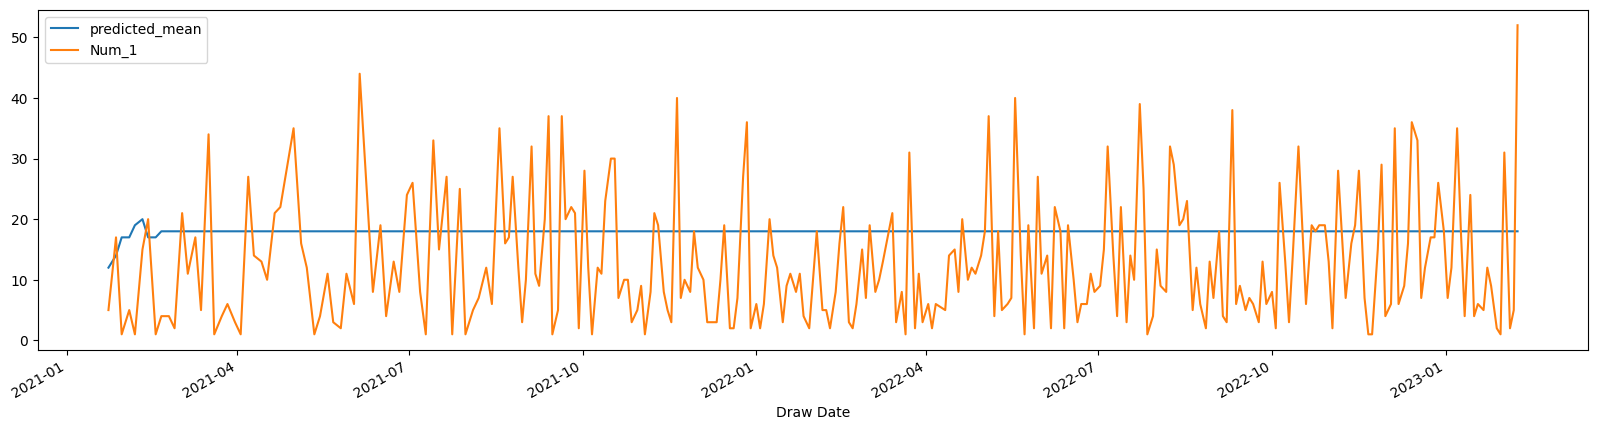

In [ ]:
plt.figure(figsize=(20,5))
pred1.plot(legend=True)
test['Num_1'].plot(legend=True)

In [ ]:
test['Num_1'].mean ()

12.727272727272727

For Num_2,

In [ ]:
ad_test(df1['Num_2'])

1. ADF :  -9.023313319527496
2. P-Value :  5.697672710375037e-15
3. Num of Lags :  10
4. Num of observations used for ADF Regression and Critical Values Calculation :  1418
5. Critical Values : 
	 1% :  -3.4349700122033804
	 5% :  -2.8635804131233096
	 10% :  -2.567856305330816


In [ ]:
stepwise_fit2 = auto_arima(df1['Num_2'], trace=True, supress_warnings=True)
stepwise_fit2.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.60 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12060.967, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11659.888, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12058.971, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=11487.290, Time=0.24 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=11356.691, Time=0.53 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=11299.943, Time=0.77 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=11231.767, Time=1.21 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=11043.240, Time=5.11 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=11041.440, Time=2.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=11040.310, Time=1.60 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11040.107, Time=1.19 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.94 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   :

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1429
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -5513.475
Date:                Fri, 30 Jun 2023   AIC                          11038.949
Time:                        15:59:26   BIC                          11070.533
Sample:                             0   HQIC                         11050.745
                               - 1429                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7328      0.270     -2.718      0.007      -1.261      -0.204
ar.L2         -0.0775      0.034     -2.279      0.023      -0.144      -0.011
ar.L3         -0.0715      0.028     -2.568      0.010      -0.126      -0.017
ma.L1         -0.2958      0.267     -1.109      0.268      -0.819       0.227
ma.L2         -0.6829      0.264     -2.589      0.010      -1.200      -0.166
sigma2       131.8050      5.122     25.734      0.000     121.767     141.843
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                68.72
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.50   Skew:                             0.53
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
exog_var = ['Multiplier']
model2=ARIMA(endog=train['Num_2'], exog=train[exog_var], order=(3,1,2))
model2=model2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Num_2   No. Observations:                 1143
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -4408.512
Date:                Fri, 30 Jun 2023   AIC                           8831.024
Time:                        15:59:28   BIC                           8866.308
Sample:                             0   HQIC                          8844.348
                               - 1143                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Multiplier    -0.0723      0.298     -0.243      0.808      -0.655       0.511
ar.L1         -1.0183      0.050    -20.507      0.000      -1.116      -0.921
ar.L2         -0.0966      0.041     -2.352      0.019      -0.177      -0.016
ar.L3         -0.0665      0.029     -2.262      0.024      -0.124      -0.009
ma.L1         -0.0016      0.040     -0.040      0.968      -0.081       0.077
ma.L2         -0.9718      0.040    -24.097      0.000      -1.051      -0.893
sigma2       131.5792      5.554     23.693      0.000     120.694     142.464
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                67.47
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.77   Skew:                             0.60
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
s = len(train)
e = len(train)+len(test)-1
pred2 = model2.predict(start=s, end=e, exog = test[exog_var])
pred2.index = df1.index[s:e+1]
pred2 = round(pred2)   # the number cannot be a float
print(pred2)

Draw Date
2021-01-23    22.0
2021-01-27    22.0
2021-01-30    23.0
2021-02-03    24.0
2021-02-06    23.0
              ... 
2023-01-30    23.0
2023-02-01    23.0
2023-02-04    23.0
2023-02-06    23.0
2023-02-08    23.0
Name: predicted_mean, Length: 286, dtype: float64


<Axes: xlabel='Draw Date'>

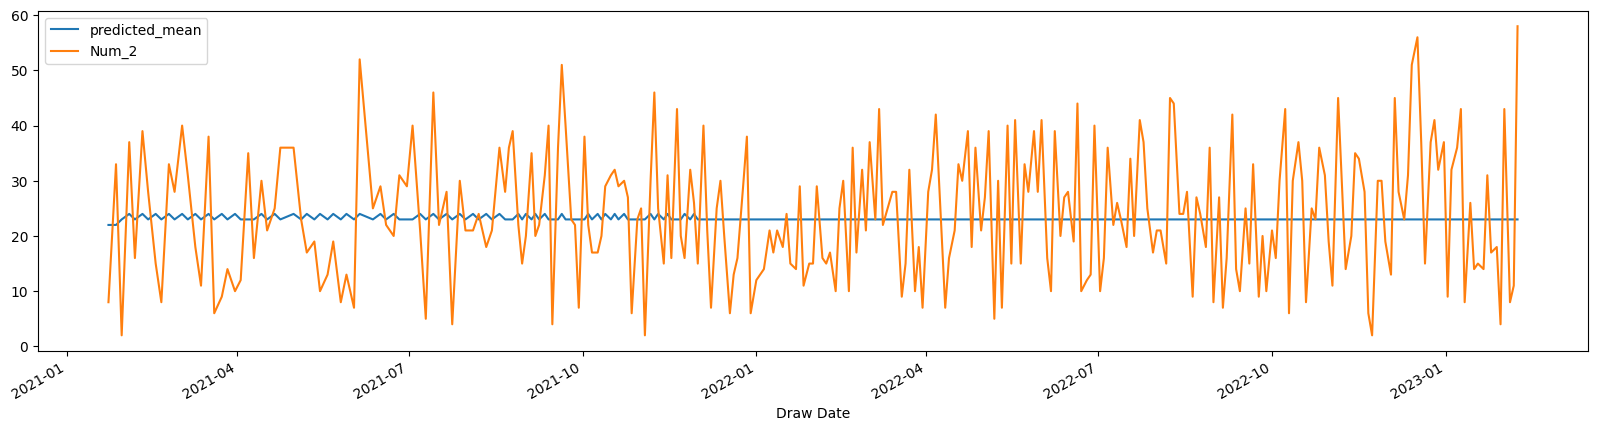

In [ ]:
plt.figure(figsize=(20,5))
pred2.plot(legend=True)
test['Num_2'].plot(legend=True)

In [ ]:
test['Num_2'].mean ()

23.884615384615383

For Num_3,

In [ ]:
ad_test(df1['Num_3'])

1. ADF :  -7.431641026494245
2. P-Value :  6.337882148771592e-11
3. Num of Lags :  11
4. Num of observations used for ADF Regression and Critical Values Calculation :  1417
5. Critical Values : 
	 1% :  -3.434973278556316
	 5% :  -2.8635818545830376
	 10% :  -2.567857072940785


In [ ]:
stepwise_fit3 = auto_arima(df1['Num_3'], trace=True, supress_warnings=True)
stepwise_fit3.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11224.513, Time=1.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12181.979, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11792.893, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11218.530, Time=1.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12179.980, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11220.529, Time=2.00 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=11220.529, Time=1.53 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11222.518, Time=1.10 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=11217.542, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=11219.542, Time=0.33 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=11219.542, Time=0.31 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=11790.893, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=11221.532, Time=0.32 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 8.631 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1429
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -5606.771
Date:                Fri, 30 Jun 2023   AIC                          11217.542
Time:                        15:59:37   BIC                          11228.070
Sample:                             0   HQIC                         11221.474
                               - 1429                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9848      0.005   -214.951      0.000      -0.994      -0.976
sigma2       150.2477      6.834     21.984      0.000     136.853     163.643
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                24.62
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.29   Skew:                             0.02
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
exog_var = ['Multiplier']
model3=ARIMA(endog=train['Num_3'], exog=train[exog_var], order=(0,1,1))
model3=model3.fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Num_3   No. Observations:                 1143
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -4479.699
Date:                Fri, 30 Jun 2023   AIC                           8965.397
Time:                        15:59:38   BIC                           8980.519
Sample:                             0   HQIC                          8971.107
                               - 1143                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Multiplier    -0.1105      0.323     -0.342      0.733      -0.744       0.523
ma.L1         -0.9834      0.005   -181.208      0.000      -0.994      -0.973
sigma2       149.0652      7.590     19.639      0.000     134.189     163.942
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                20.25
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.48   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
s = len(train)
e = len(train)+len(test)-1
pred3 = model3.predict(start=s, end=e, exog = test[exog_var])
pred3.index = df1.index[s:e+1]
pred3 = round(pred3)   # the number cannot be a float
print(pred3)

Draw Date
2021-01-23    34.0
2021-01-27    34.0
2021-01-30    34.0
2021-02-03    34.0
2021-02-06    34.0
              ... 
2023-01-30    34.0
2023-02-01    34.0
2023-02-04    34.0
2023-02-06    34.0
2023-02-08    34.0
Name: predicted_mean, Length: 286, dtype: float64


<Axes: xlabel='Draw Date'>

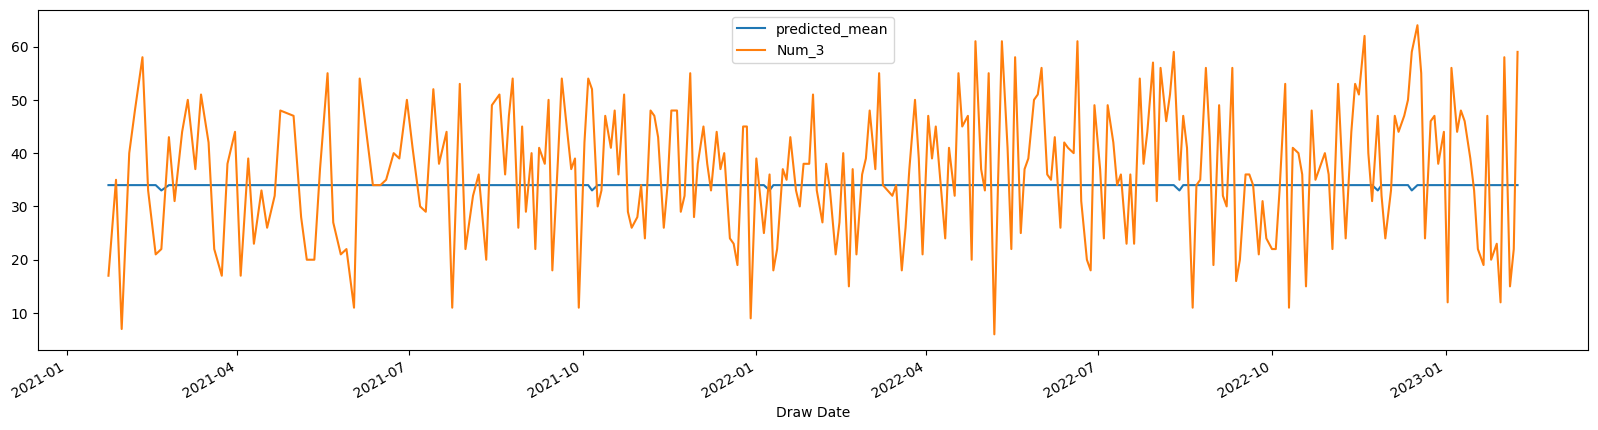

In [ ]:
plt.figure(figsize=(20,5))
pred3.plot(legend=True)
test['Num_3'].plot(legend=True)

In [ ]:
test['Num_3'].mean ()

36.62937062937063

For Num_4

In [ ]:
ad_test(df1['Num_4'])

1. ADF :  -6.326465295425501
2. P-Value :  2.9780007205147987e-08
3. Num of Lags :  12
4. Num of observations used for ADF Regression and Critical Values Calculation :  1416
5. Critical Values : 
	 1% :  -3.434976549531161
	 5% :  -2.86358329808087
	 10% :  -2.5678578416363433


In [ ]:
stepwise_fit4 = auto_arima(df1['Num_4'], trace=True, supress_warnings=True)
stepwise_fit4.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11071.577, Time=1.87 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12047.380, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11636.134, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11068.156, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12045.382, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11069.823, Time=0.79 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=11069.815, Time=0.69 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11070.679, Time=1.44 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=11066.729, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=11068.355, Time=0.28 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=11068.345, Time=0.27 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=11634.134, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=11069.265, Time=0.99 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 7.233 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1429
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -5531.364
Date:                Fri, 30 Jun 2023   AIC                          11066.729
Time:                        15:59:46   BIC                          11077.257
Sample:                             0   HQIC                         11070.660
                               - 1429                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9803      0.005   -197.353      0.000      -0.990      -0.971
sigma2       135.2186      5.668     23.858      0.000     124.110     146.327
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):                58.94
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               1.24   Skew:                            -0.46
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
exog_var = ['Multiplier']
model4=ARIMA(endog=train['Num_4'], exog=train[exog_var], order=(0,1,1))
model4=model4.fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Num_4   No. Observations:                 1143
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -4424.791
Date:                Fri, 30 Jun 2023   AIC                           8855.582
Time:                        15:59:46   BIC                           8870.703
Sample:                             0   HQIC                          8861.292
                               - 1143                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Multiplier    -0.0016      0.363     -0.004      0.996      -0.713       0.710
ma.L1         -0.9765      0.006   -160.419      0.000      -0.988      -0.965
sigma2       135.4526      6.326     21.413      0.000     123.054     147.851
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                49.41
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               1.49   Skew:                            -0.48
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
s = len(train)
e = len(train)+len(test)-1
pred4 = model4.predict(start=s, end=e, exog = test[exog_var])
pred4.index = df1.index[s:e+1]
pred4 = round(pred4)   # the number cannot be a float
print(pred4)

Draw Date
2021-01-23    48.0
2021-01-27    48.0
2021-01-30    48.0
2021-02-03    48.0
2021-02-06    48.0
              ... 
2023-01-30    48.0
2023-02-01    48.0
2023-02-04    48.0
2023-02-06    48.0
2023-02-08    48.0
Name: predicted_mean, Length: 286, dtype: float64


<Axes: xlabel='Draw Date'>

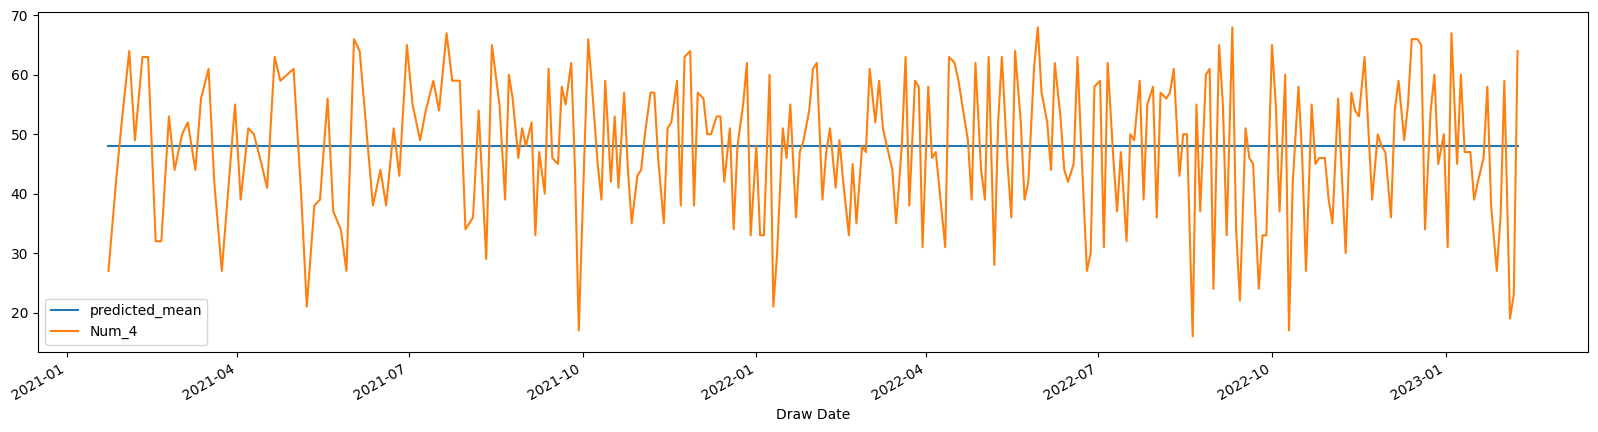

In [ ]:
plt.figure(figsize=(20,5))
pred4.plot(legend=True)
test['Num_4'].plot(legend=True)

In [ ]:
test['Num_4'].mean ()

47.84965034965035

For Num_5,

In [ ]:
ad_test(df1['Num_5'])

1. ADF :  -3.1166014336057133
2. P-Value :  0.02534875410402173
3. Num of Lags :  21
4. Num of observations used for ADF Regression and Critical Values Calculation :  1407
5. Critical Values : 
	 1% :  -3.4350061979197215
	 5% :  -2.863596381993834
	 10% :  -2.5678648091303056


In [ ]:
stepwise_fit5 = auto_arima(df1['Num_5'], trace=True, supress_warnings=True)
stepwise_fit5.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10449.833, Time=3.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11384.253, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11009.906, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10447.124, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11382.254, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10449.060, Time=0.87 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=10449.056, Time=1.60 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10448.137, Time=1.10 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=10446.017, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=10447.967, Time=0.27 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=10447.964, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=11007.908, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=10447.053, Time=0.40 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 8.549 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1429
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -5221.009
Date:                Fri, 30 Jun 2023   AIC                          10446.017
Time:                        15:59:56   BIC                          10456.545
Sample:                             0   HQIC                         10449.949
                               - 1429                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9712      0.006   -166.022      0.000      -0.983      -0.960
sigma2        87.5706      2.689     32.564      0.000      82.300      92.841
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               424.33
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               1.25   Skew:                            -1.18
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
exog_var = ['Multiplier']
model5=ARIMA(endog=train['Num_5'], exog=train[exog_var], order=(0,1,1))
model5=model5.fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Num_5   No. Observations:                 1143
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -4162.309
Date:                Fri, 30 Jun 2023   AIC                           8330.618
Time:                        15:59:56   BIC                           8345.740
Sample:                             0   HQIC                          8336.328
                               - 1143                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Multiplier     0.0512      0.289      0.177      0.859      -0.515       0.617
ma.L1         -0.9652      0.007   -134.864      0.000      -0.979      -0.951
sigma2        85.5662      2.982     28.693      0.000      79.721      91.411
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               301.35
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               1.40   Skew:                            -1.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
s = len(train)
e = len(train)+len(test)-1
pred5 = model5.predict(start=s, end=e, exog = test[exog_var])
pred5.index = df1.index[s:e+1]
pred5 = round(pred5)   # the number cannot be a float
print(pred5)

Draw Date
2021-01-23    58.0
2021-01-27    58.0
2021-01-30    58.0
2021-02-03    58.0
2021-02-06    58.0
              ... 
2023-01-30    58.0
2023-02-01    58.0
2023-02-04    58.0
2023-02-06    58.0
2023-02-08    58.0
Name: predicted_mean, Length: 286, dtype: float64


<Axes: xlabel='Draw Date'>

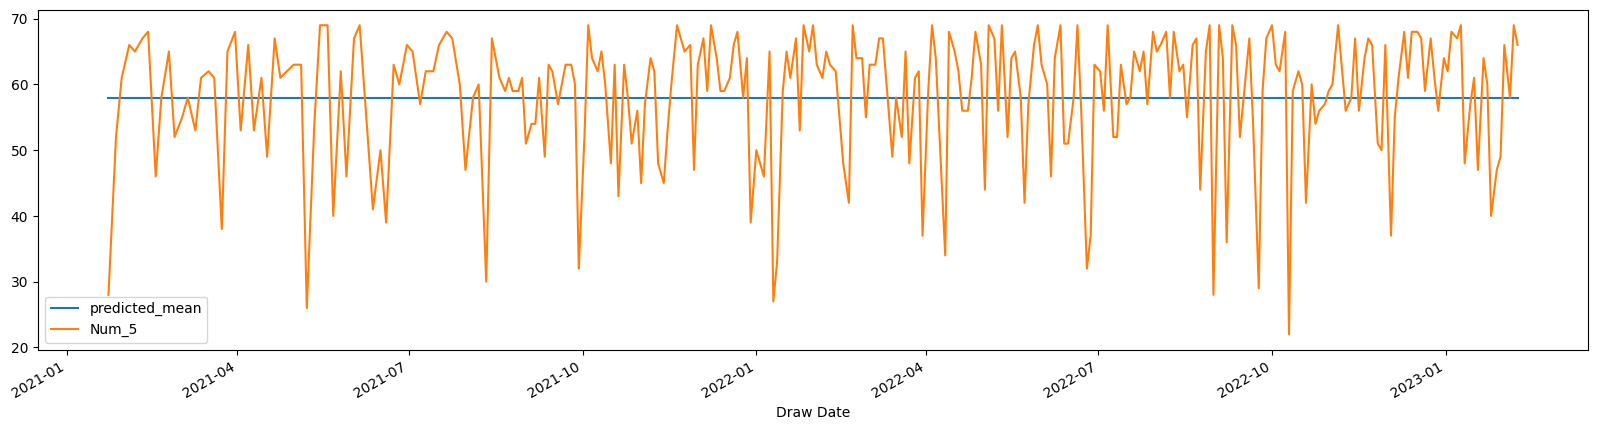

In [ ]:
plt.figure(figsize=(20,5))
pred5.plot(legend=True)
test['Num_5'].plot(legend=True)

In [ ]:
test['Num_5'].mean ()

58.39160839160839

For Powerball_Num,

In [ ]:
ad_test(df1['Powerball_Num'])

1. ADF :  -7.724499472418711
2. P-Value :  1.1687566039177732e-11
3. Num of Lags :  10
4. Num of observations used for ADF Regression and Critical Values Calculation :  1418
5. Critical Values : 
	 1% :  -3.4349700122033804
	 5% :  -2.8635804131233096
	 10% :  -2.567856305330816


In [ ]:
stepwise_fitp = auto_arima(df1['Powerball_Num'], trace=True, supress_warnings=True)
stepwise_fitp.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10323.222, Time=1.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11306.053, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10866.345, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10317.887, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11304.054, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10319.467, Time=0.85 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=10319.480, Time=1.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10321.312, Time=3.10 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=10317.044, Time=0.81 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=10318.534, Time=1.01 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=10318.548, Time=0.56 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=10864.346, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=10320.229, Time=1.66 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 11.432 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1429
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -5156.522
Date:                Fri, 30 Jun 2023   AIC                          10317.044
Time:                        16:00:08   BIC                          10327.572
Sample:                             0   HQIC                         10320.976
                               - 1429                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9830      0.005   -179.676      0.000      -0.994      -0.972
sigma2        79.9796      4.143     19.306      0.000      71.860      88.099
===================================================================================
Ljung-Box (L1) (Q):                   0.52   Jarque-Bera (JB):                54.34
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):               0.51   Skew:                             0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
exog_var = ['Multiplier']
modelp=ARIMA(endog=train['Powerball_Num'], exog=train[exog_var], order=(0,1,1))
modelp=modelp.fit()
modelp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Powerball_Num   No. Observations:                 1143
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -4162.504
Date:                Fri, 30 Jun 2023   AIC                           8331.007
Time:                        16:00:09   BIC                           8346.129
Sample:                             0   HQIC                          8336.717
                               - 1143                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Multiplier     0.0839      0.262      0.320      0.749      -0.430       0.598
ma.L1         -0.9806      0.007   -146.115      0.000      -0.994      -0.967
sigma2        85.5515      4.997     17.119      0.000      75.757      95.346
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                44.86
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                            -0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
s = len(train)
e = len(train)+len(test)-1
predp = modelp.predict(start=s, end=e, exog = test[exog_var])
predp.index = df1.index[s:e+1]
predp = round(predp)   # the number cannot be a float
print(predp)

Draw Date
2021-01-23    13.0
2021-01-27    13.0
2021-01-30    13.0
2021-02-03    13.0
2021-02-06    13.0
              ... 
2023-01-30    13.0
2023-02-01    13.0
2023-02-04    13.0
2023-02-06    13.0
2023-02-08    13.0
Name: predicted_mean, Length: 286, dtype: float64


<Axes: xlabel='Draw Date'>

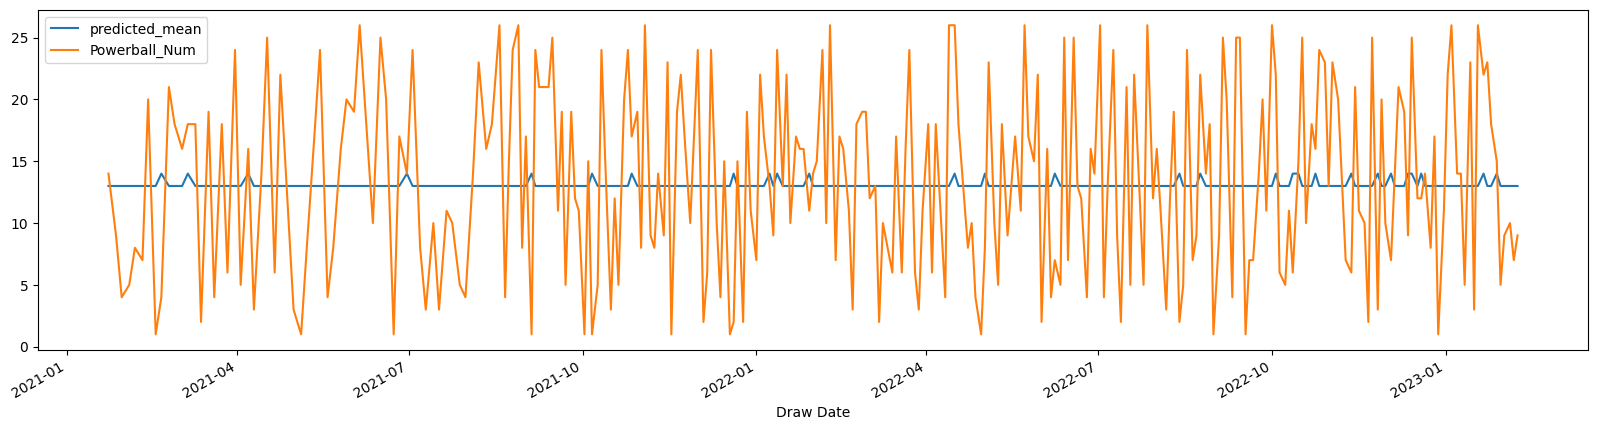

In [ ]:
plt.figure(figsize=(20,5))
predp.plot(legend=True)
test['Powerball_Num'].plot(legend=True)

In [ ]:
test['Powerball_Num'].mean ()

13.384615384615385

##**Summary :**

*   Through the above graphical analysis, we can conclude that there is not much correlation between the numbers and their draw date. Hence, the time series model might not give accurate predictions. The data can be processed using techniques such as noise filtering or denoising algorithms to remove or reduce the noise.
*   On applying the ARIMA model, we get predictions which are close to the mean value of the test data.



##<-----------------------Question 5----------------------------->

####Q5 : How can you evaluate the performance of the luckiest number prediction model? What metrics or methods would be appropriate to assess the accuracy of the predicted lucky numbers compared to the actual winning numbers?


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
# RMSE for Num_1
rmse1 = sqrt(mean_squared_error(pred1, test['Num_1']))
print(rmse1)

11.47039363186504


In [ ]:
# RMSE for Num_2
rmse2 = sqrt(mean_squared_error(pred2, test['Num_2']))
print(rmse2)

11.541957512345261


In [ ]:
# RMSE for Num_3
rmse3 = sqrt(mean_squared_error(pred3, test['Num_3']))
print(rmse3)

12.68030795328764


In [ ]:
# RMSE for Num_4
rmse4 = sqrt(mean_squared_error(pred4, test['Num_4']))
print(rmse4)

11.495666559636707


In [ ]:
# RMSE for Num_5
rmse5 = sqrt(mean_squared_error(pred5, test['Num_5']))
print(rmse5)

9.66863576118769


In [ ]:
# RMSE for Powerball_Num
rmsep = sqrt(mean_squared_error(predp, test['Powerball_Num']))
print(rmsep)

7.564639860811368


##**Summary :**
###We can find Root Mean Squared Error to get the deviation of the prediction from the actual values.

###To conclude,
###The luckiest numbers are as follows:

####*   Num_1 : 18
####*   Num_2 : 23
####*   Num_3 : 34
####*   Num_4 : 48
####*   Num_5 : 58
####*   Powerball_Num : 13